In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

import keras
import sys
import keras.losses
import tensorflow as tf
import  keras.backend as  K
from scipy.stats import gaussian_kde
import seaborn as sns
from tensorflow.python.keras import losses





Using TensorFlow backend.


In [3]:
def data_all():
    
    df_x = pd.read_csv('x_final_final.csv')
    df_y = pd.read_csv('y_final_final_lambda.csv')
    df_z = pd.read_csv('y_final_final_hyperflow.csv')

    x = df_x.values
    y = df_y.values
    z = df_z.values

    x = np.asarray(x).astype('float32')
    y = np.asarray(y).astype('float32')
    z = np.asarray(z).astype('float32')
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
    return x, y, z

In [32]:
len(pd.read_csv('x_full.csv'))


40098

       x_ram  x_task  x_workflow       y_test       y_pred    avg_in  \
12078  256.0     1.0         1.0  3481.000000  1889.683350  0.870620   
12079  256.0     1.0         1.0  3600.000000  2048.107422  0.870721   
12080  256.0     1.0         1.0  3343.000000  2316.054932  0.870620   
12081  256.0     1.0         1.0  3282.000000  2193.772217  0.870620   
12082  256.0     1.0         1.0  3445.000000  1776.900513  0.870721   
...      ...     ...         ...          ...          ...       ...   
34140  256.0     1.0         1.0  2065.000000  2090.975586  0.870921   
34141  256.0     1.0         1.0  3913.999756  2090.975586  0.870921   
34142  256.0     1.0         1.0  1585.000000  1776.900269  0.870721   
34143  256.0     1.0         1.0  2359.000000  1889.665039  0.870921   
34144  256.0     1.0         1.0  1897.000000  2047.925659  0.870520   

       count_in  avg_out  count_out  
12078  0.298648      0.0   0.003003  
12079  0.298648      0.0   0.003982  
12080  0.298648      

<Figure size 720x720 with 0 Axes>

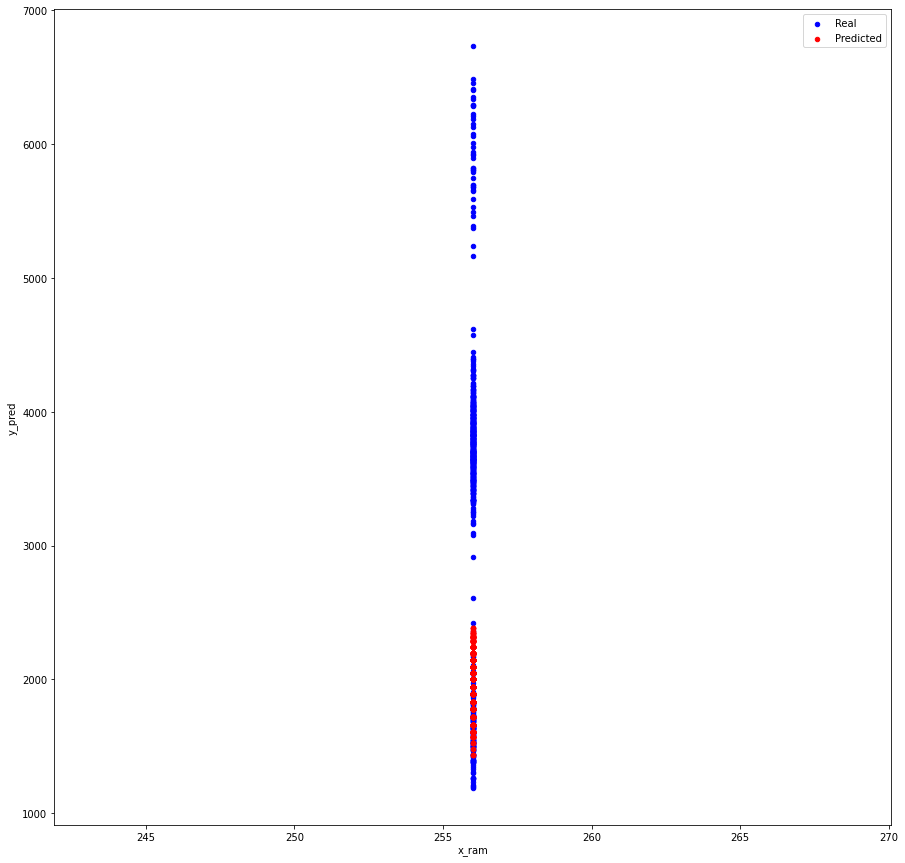

In [9]:
best_model = keras.models.load_model('./best-256-run-normalized')

y_pred = best_model.predict(x)
np.set_printoptions(precision=5)
np.set_printoptions(threshold=sys.maxsize)
test_vs_pred = np.concatenate((y_pred.reshape(len(y_pred), 1), y.reshape(len(y),1)), 1)* (28637.0 - 169.0) + 169.0

dataset = pd.DataFrame({'x_ram': x[:, 0] * (3008 -  128) + 128,
                    'x_task': x[:,3]*7,
                    'x_workflow': x[:,-1]*2 + 1,
                    'y_test': test_vs_pred[:, 1],
                    'y_pred': test_vs_pred[:, 0],
                    'avg_in' : x[:, 6],
                    'count_in' : x[:, 7],
                    'avg_out' : x[:, 12],
                    'count_out' : x[:, 13]})
df = dataset[(dataset['x_task'] == 1) & (dataset['x_workflow'] == 1.0) & (dataset['x_ram'] == 256)]
print(df)
plt.figure (figsize=(10,10))
ax = df.plot(kind = 'scatter', x = 'x_ram',
                  y = 'y_test', color = 'Blue', figsize=(15,15), label="Real")

ax2 = df.plot(kind = 'scatter', x = 'x_ram', 
                   y = 'y_pred',
                   color = 'Red',
                   ax = ax, figsize=(15,15), label="Predicted")

In [4]:
def show_results(best_model, x, y, z):
    y_pred = best_model.predict(x)
    np.set_printoptions(precision=5)
    np.set_printoptions(threshold=sys.maxsize)
    test_vs_pred = np.concatenate((y_pred.reshape(len(y_pred), 1), y.reshape(len(y),1)), 1)* (28682.0 - 167.0) + 167.0
    z =  z.reshape(len(z),1)* (78425.0 - 484.0) + 484.0

    print("MAE: " + str(mean_absolute_error(y_pred, y)))
    print("MSE: " + str(mean_squared_error(y_pred, y)))
    print("RMSE: " + str(mean_squared_error(y_pred, y, squared=False)))
    print("R2 SCORE: " + str(r2_score(y_pred, y)))
    
    print(len(z[:,0]))
    print(len(test_vs_pred[:, 0]))
    
    
    dataset = pd.DataFrame({'x_ram': (x[:, 0] * (3008 -  128) + 128).astype(int),
                        'x_task': x[:,3]*7,
                        'x_workflow': x[:,-1]*2 + 1,
                        'y_test': test_vs_pred[:, 0],
                        'Time': 'Real'})
    
    dataset = pd.concat([pd.DataFrame({'x_ram': (x[:, 0] * (3008 -  128) + 128).astype(int),
                    'x_task': x[:,3]*7,
                    'x_workflow': x[:,-1]*2 + 1,
                    'y_test': test_vs_pred[:, 1],
                    'Time': 'Predicted'}), dataset])
    
#     dataset = pd.concat([pd.DataFrame({'x_ram': (x[:, 0] * (3008 -  128) + 128).astype(int),
#                 'x_task': x[:,3]*7,
#                 'x_workflow': x[:,-1]*2 + 1,
#                 'y_test': z[:, 0],
#                 'Time': 'Full'}), dataset])
    
    for task_type in range(0,8):

        df = dataset[(dataset['x_task'] == task_type) & (dataset['x_workflow'] == 1.0)]
        fig, ax = plt.subplots()
        fig.set_size_inches(15, 15)
        
        rotateTickLabels(ax, 90, 'x')

        scatter = sns.stripplot(data =df, x="x_ram", y="y_test", hue="Time", dodge=True, jitter=0.2, size=2)
    
                    

#         ax = df.plot(kind = 'scatter', x = 'x_ram',
#                           y = 'y_test', figsize=(15,15), label="Real", c=full_z)

#         ax2 = df.plot(kind = 'scatter', x = 'x_ram', 
#                            y = 'y_pred',
#                            color = 'Red',
#                            ax = ax, figsize=(15,15), label="Predicted")


In [5]:
def rotateTickLabels(ax, rotation, which, rotation_mode='anchor', ha='right'):
    axes = []
    if which in ['x', 'both']:
        axes.append(ax.xaxis)

    elif which in ['y', 'both']:
        axes.append(ax.yaxis)

    for axis in axes:
        for t in axis.get_ticklabels():
            t.set_horizontalalignment(ha)
            t.set_rotation(rotation)
            t.set_rotation_mode(rotation_mode)

In [6]:
def custom_loss_function(y_actual, y_predicted):
    mask = tf.cast(tf.math.greater_equal(y_actual, y_predicted), tf.float32)
    mask = mask*3 + 1
    y_predicted = tf.math.divide(y_predicted, mask)
    return K.mean(K.sum(K.abs(y_predicted - y_actual)))



In [7]:
def tilted_loss(q,y,f):
    e = (y-f)
    return K.mean(K.maximum(q*e, (q-1)*e), axis=-1)

In [8]:
def gaussianSum1D(gridpoints, datapoints, sigma=1):

    a = np.exp( -((gridpoints[:,None]-datapoints)/sigma)**2 )

    return a

In [9]:
x, y, z = data_all()

MAE: 0.0043373215
MSE: 0.00014176469
RMSE: 0.011906497
R2 SCORE: 0.9772430073793462
41224
41224


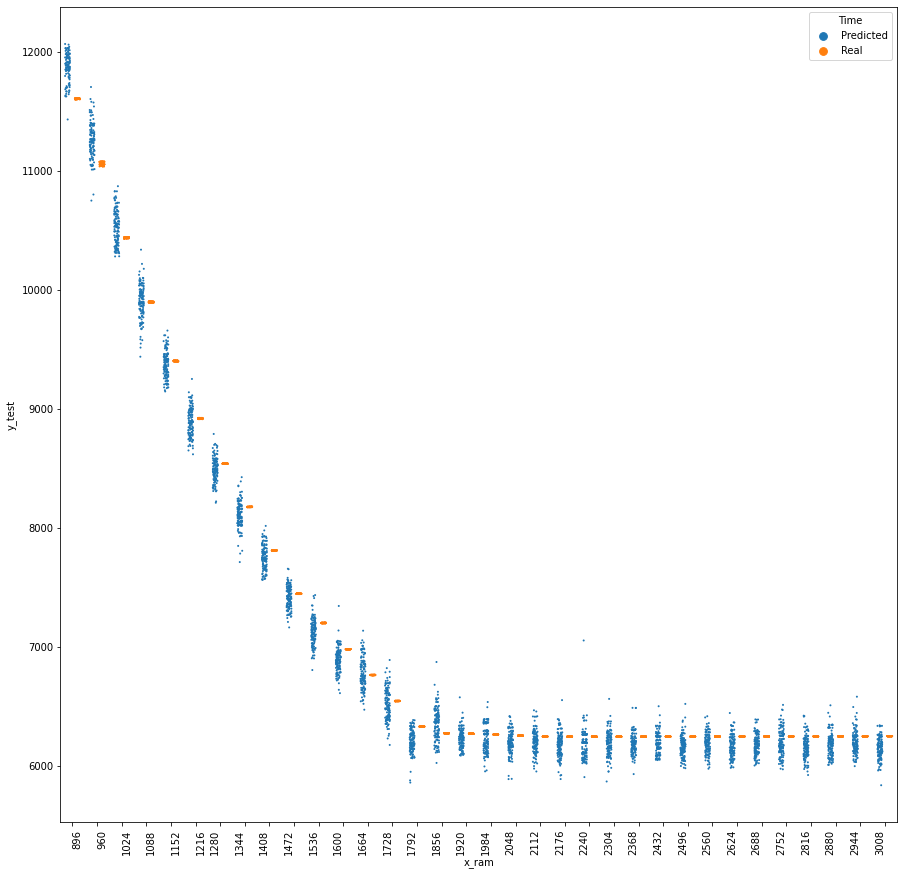

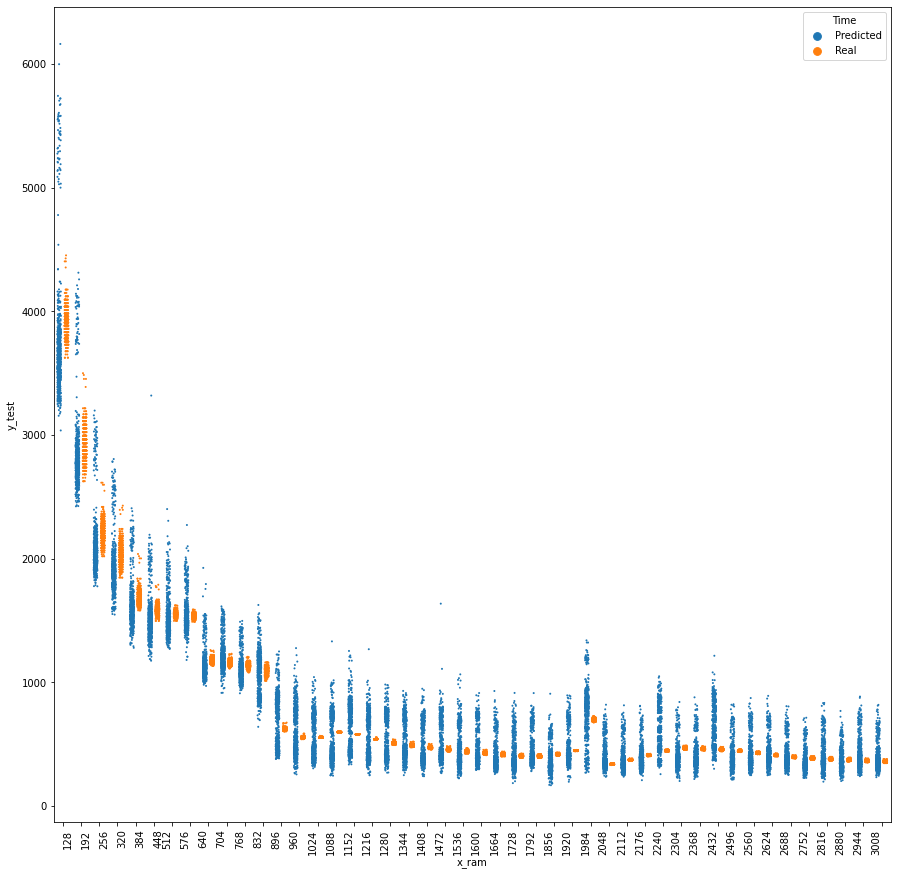

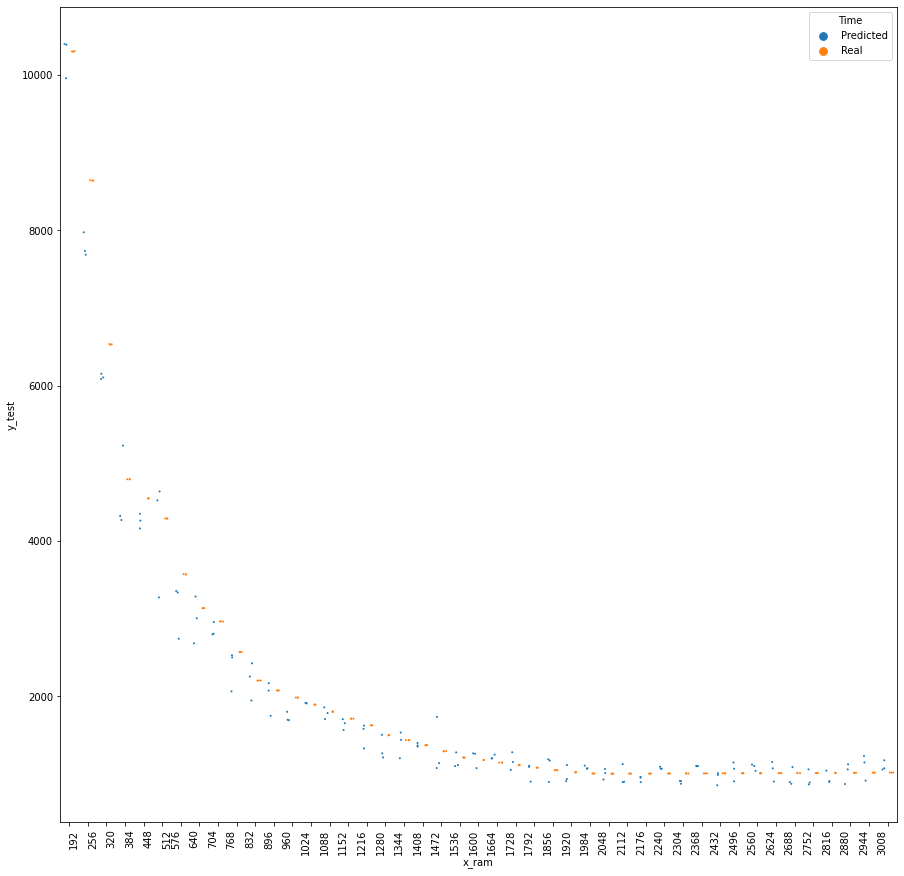

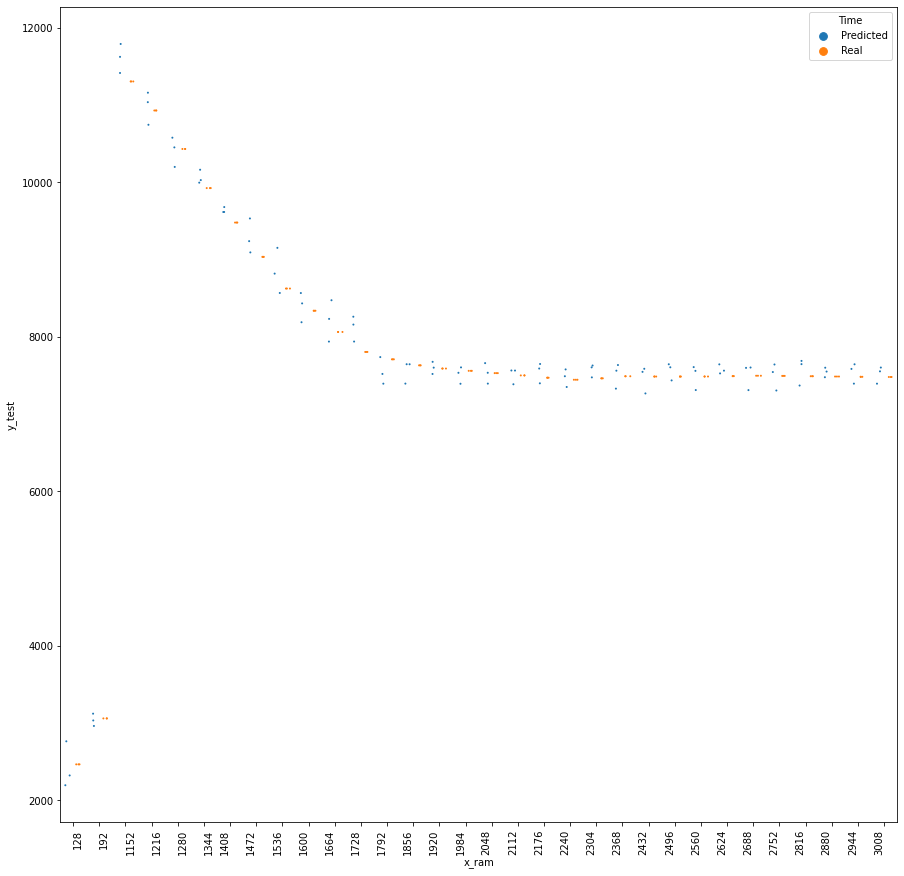

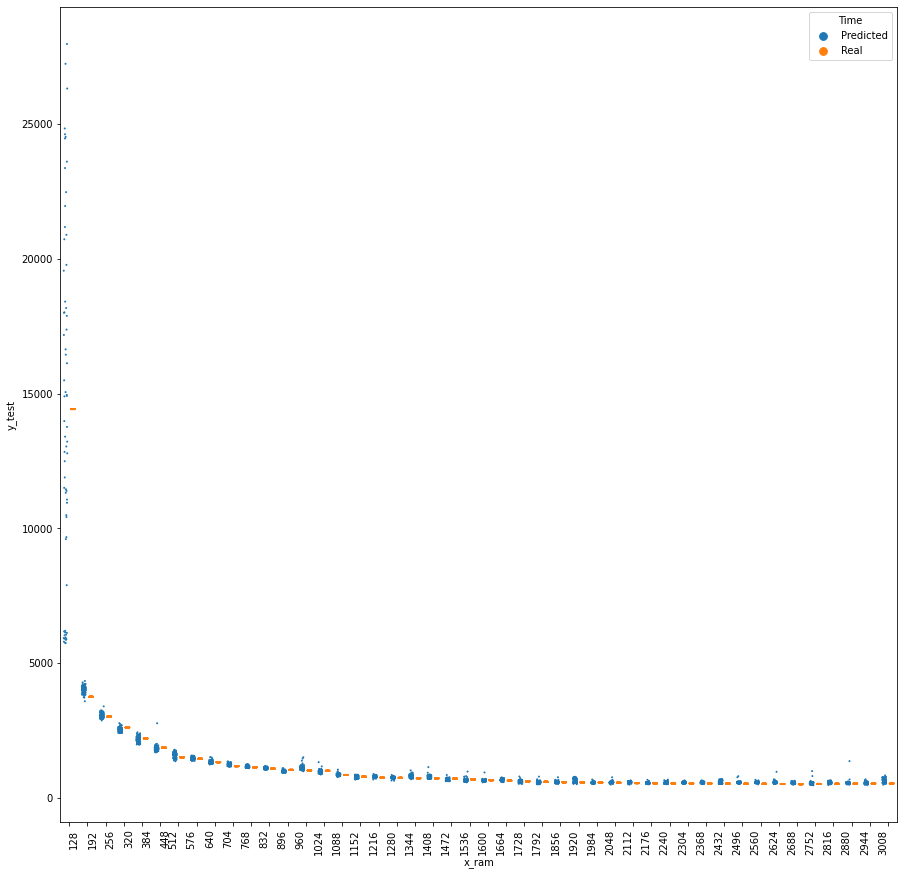

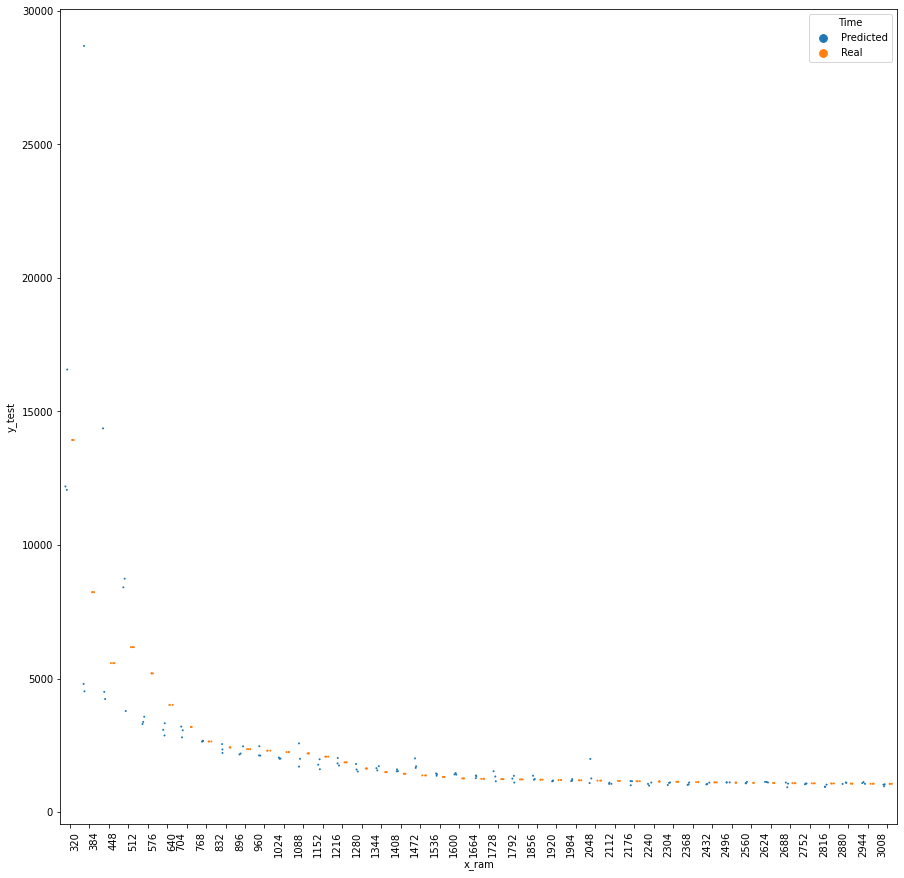

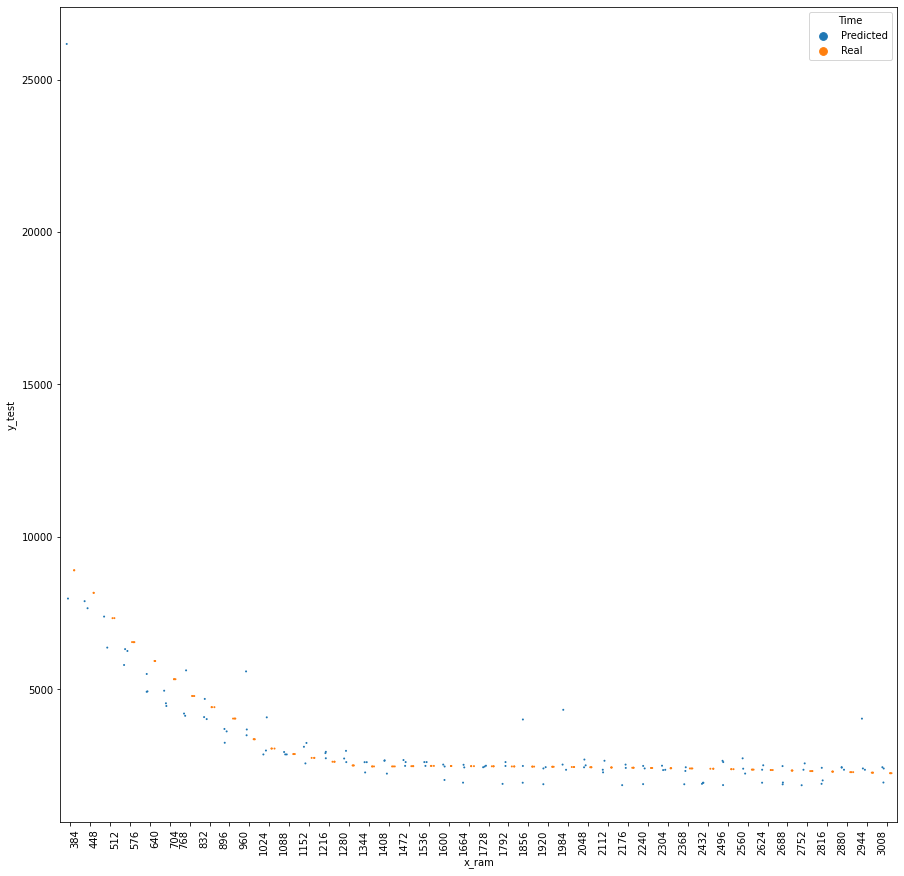

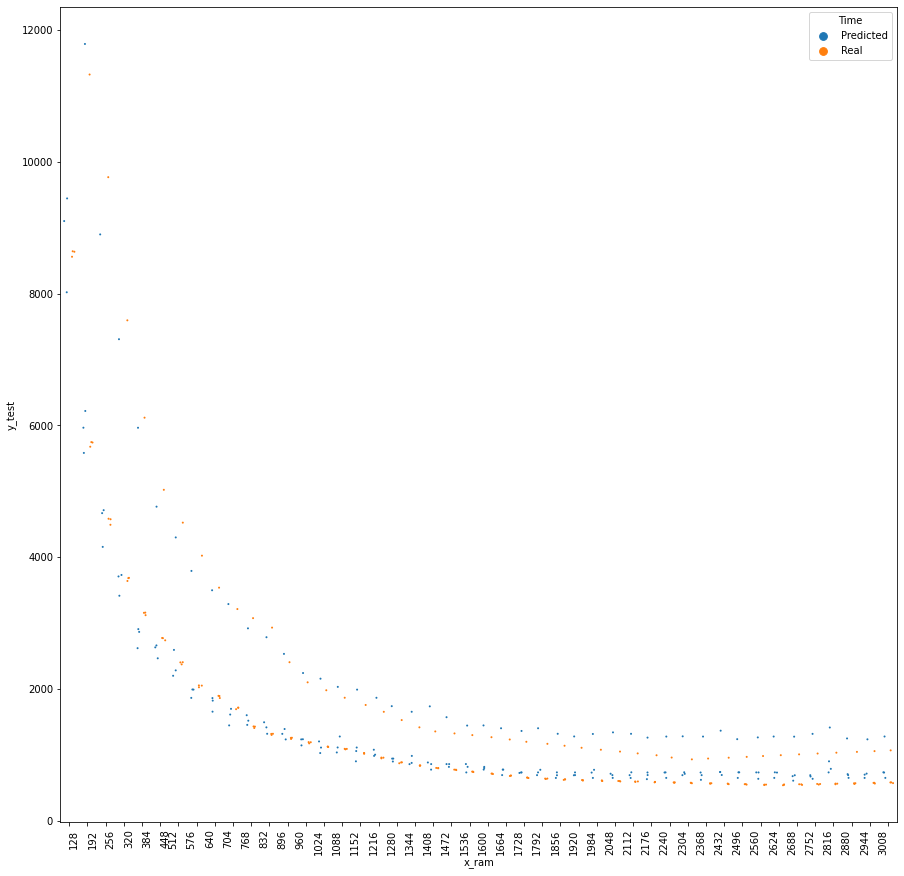

In [11]:
show_results(keras.models.load_model('./best-model-hyperflow-final-new-hyperflow'), x, z, y)


MAE: 0.005932398
MSE: 0.000117895695
RMSE: 0.010857979
R2 SCORE: 0.996519885305561
41224
41224


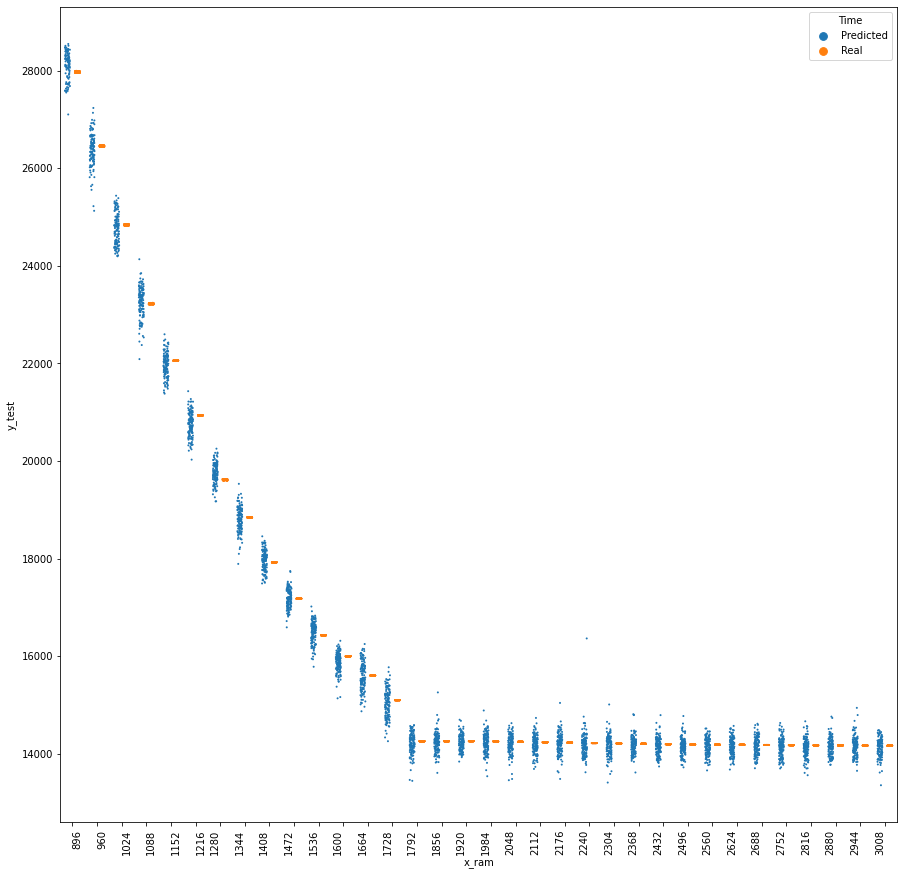

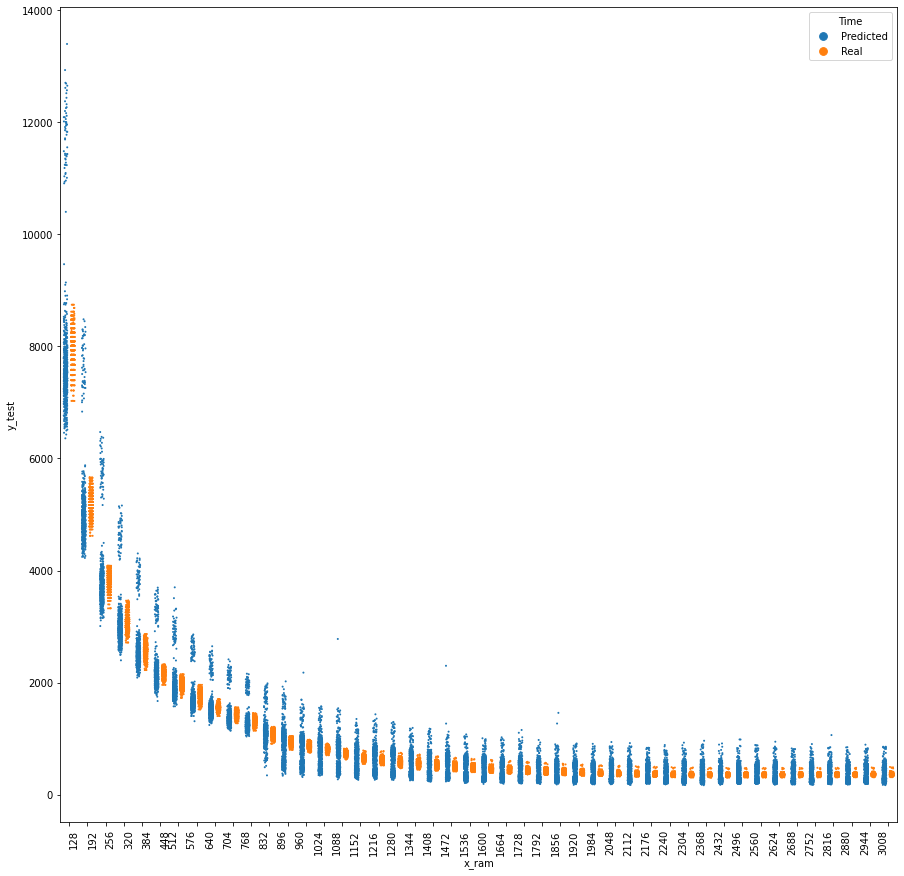

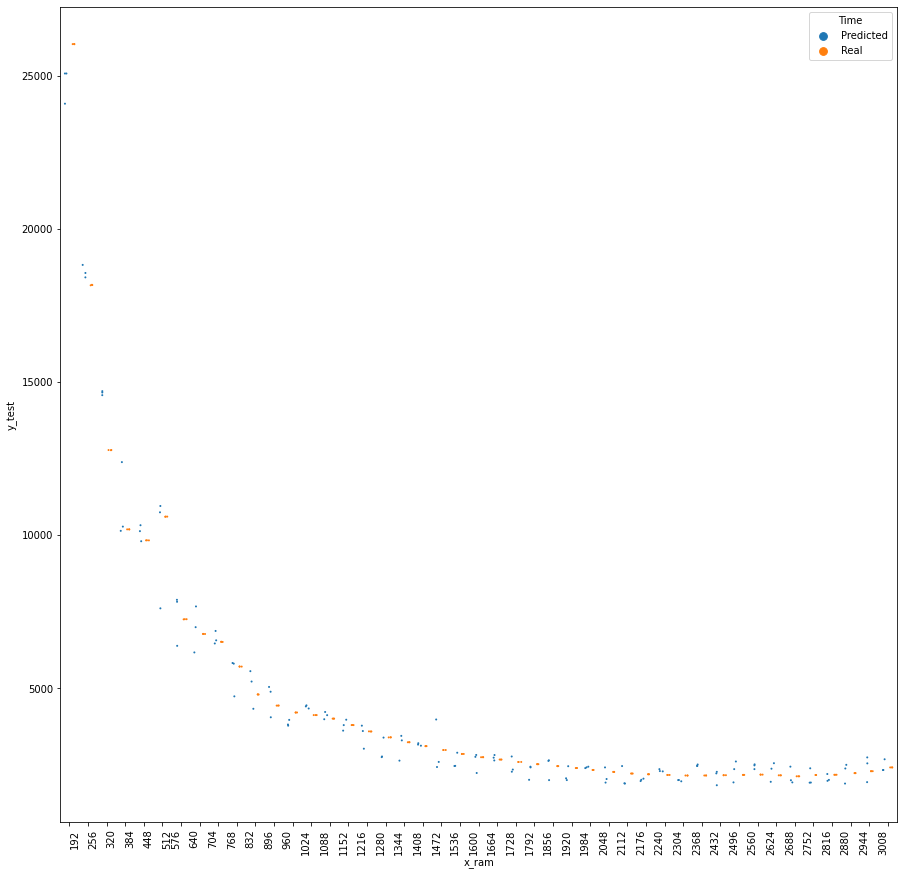

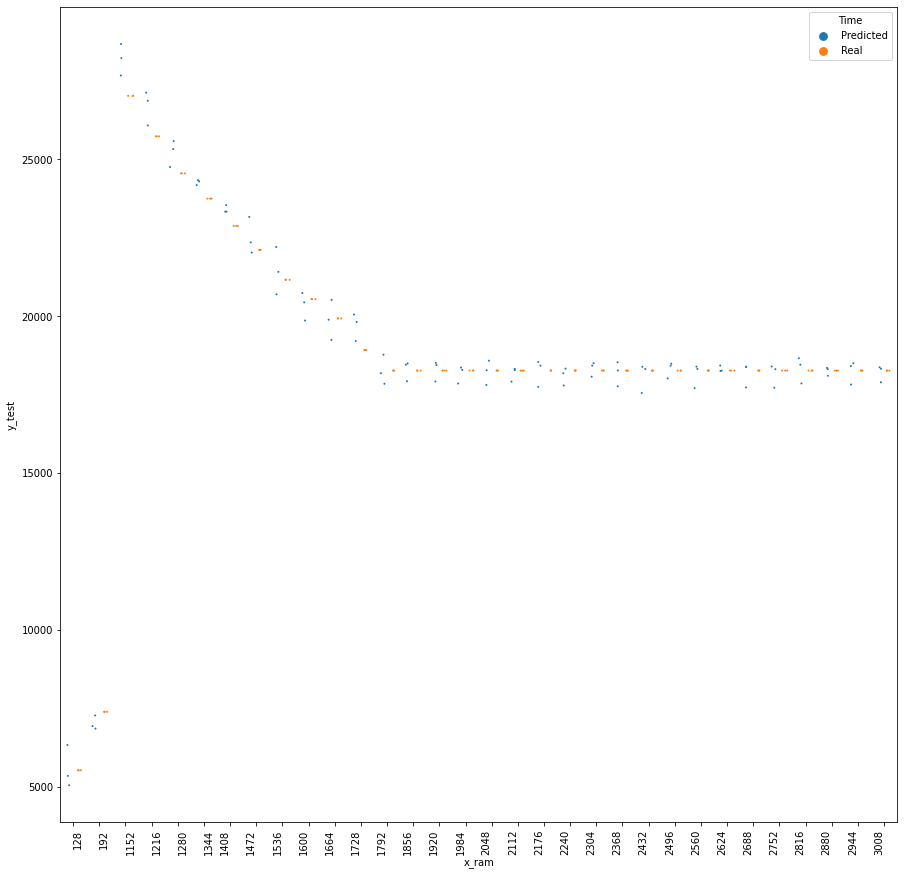

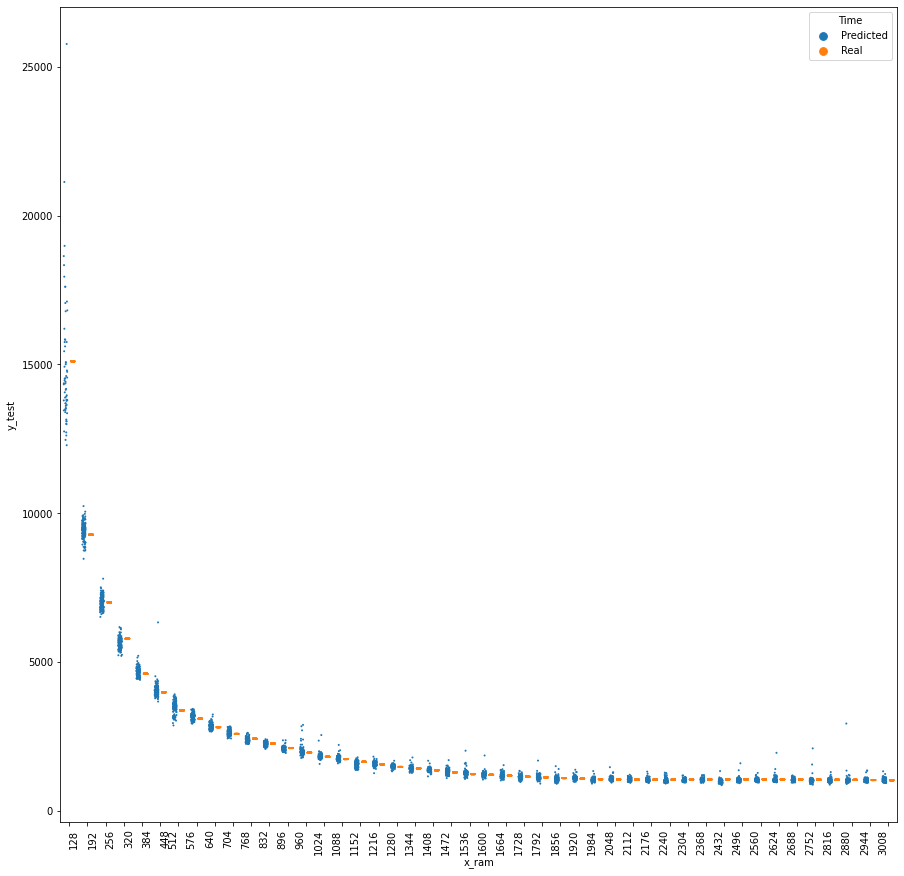

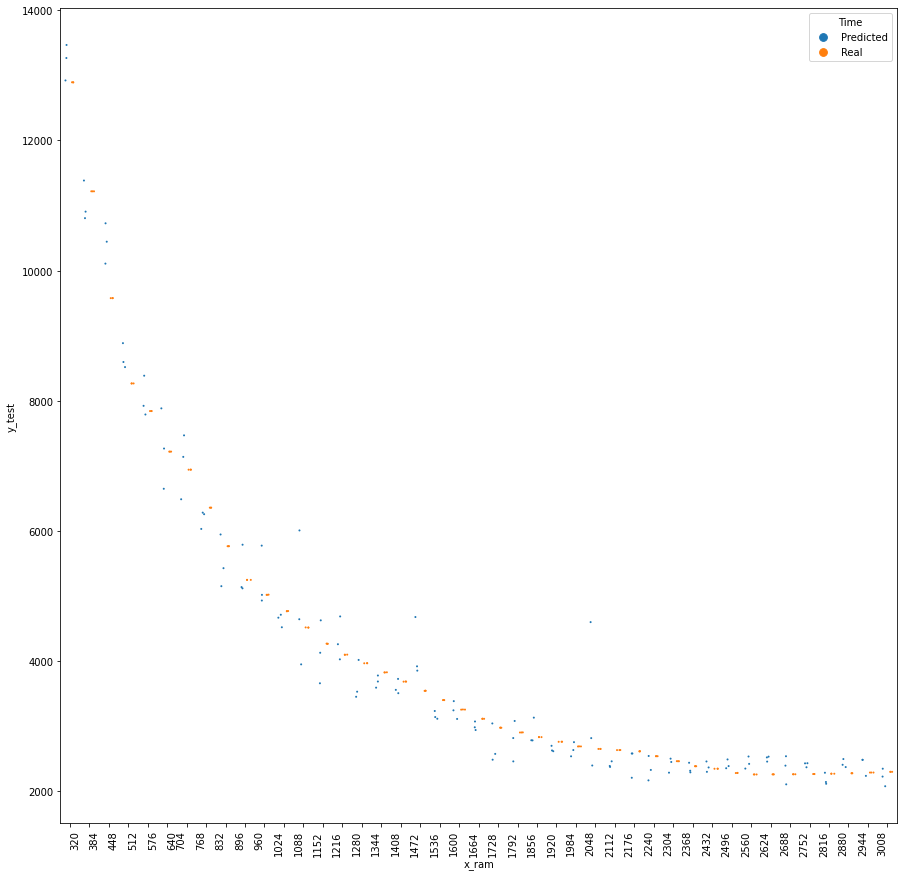

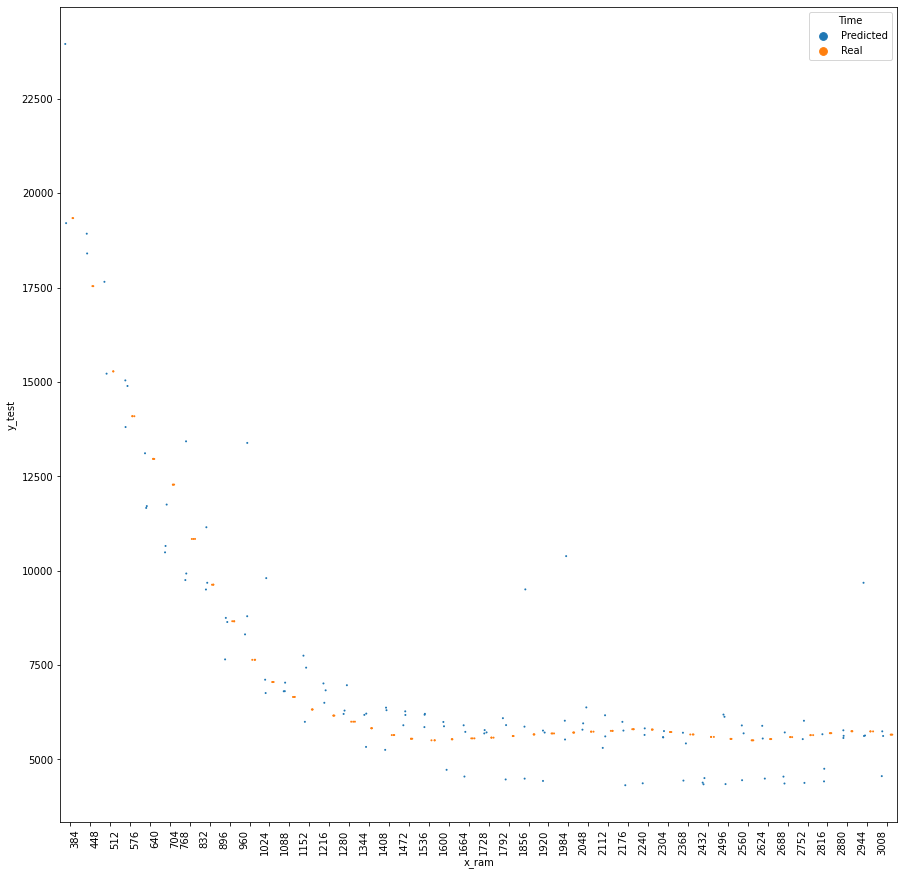

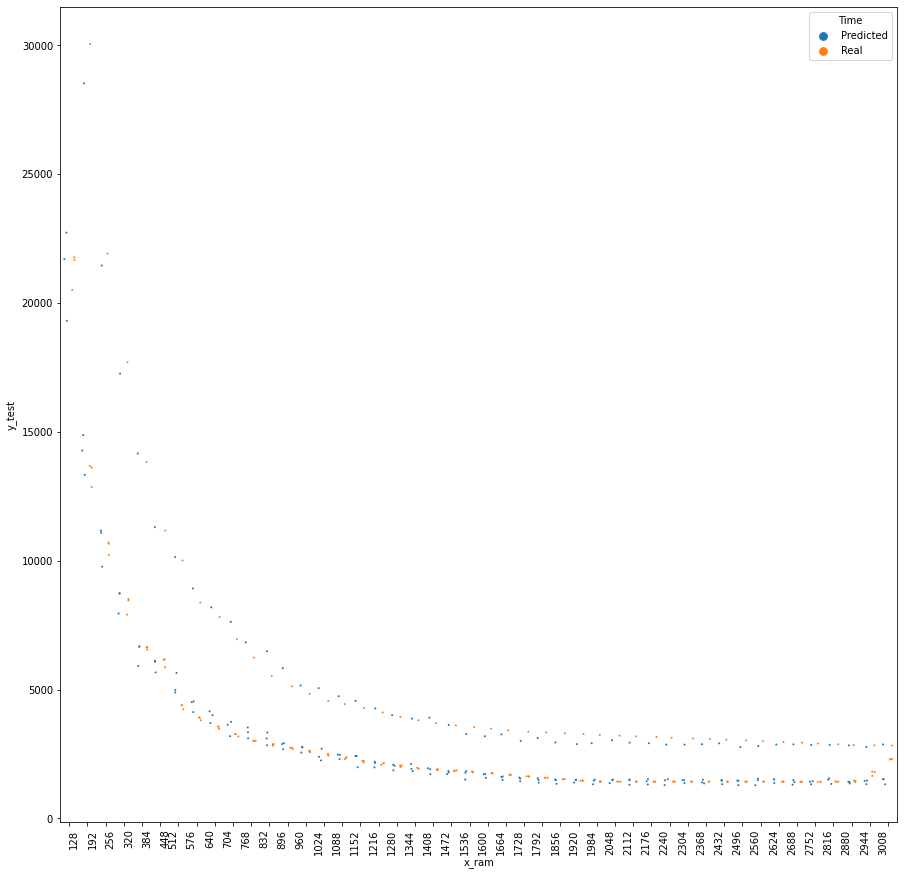

In [13]:
show_results(keras.models.load_model('./best-model-hyperflow-final-hyperflow-new'), x, y, z)


MAE: 0.008340117
MSE: 0.00026291385
RMSE: 0.016214618
R2 SCORE: 0.9921077738613939


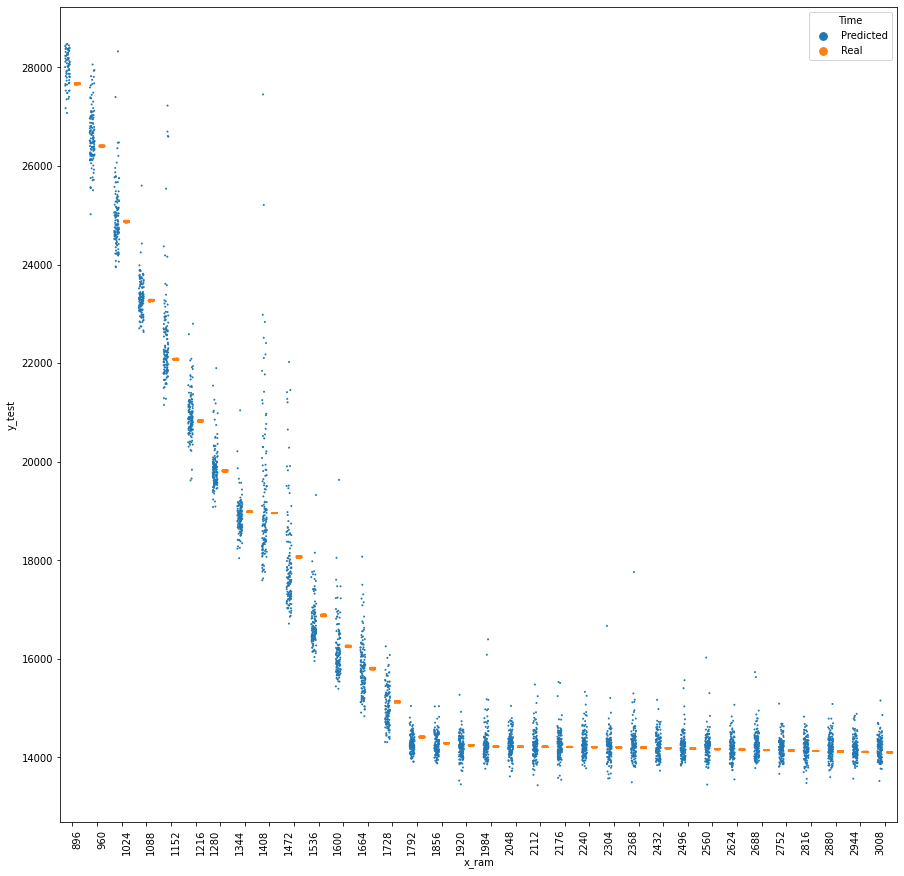

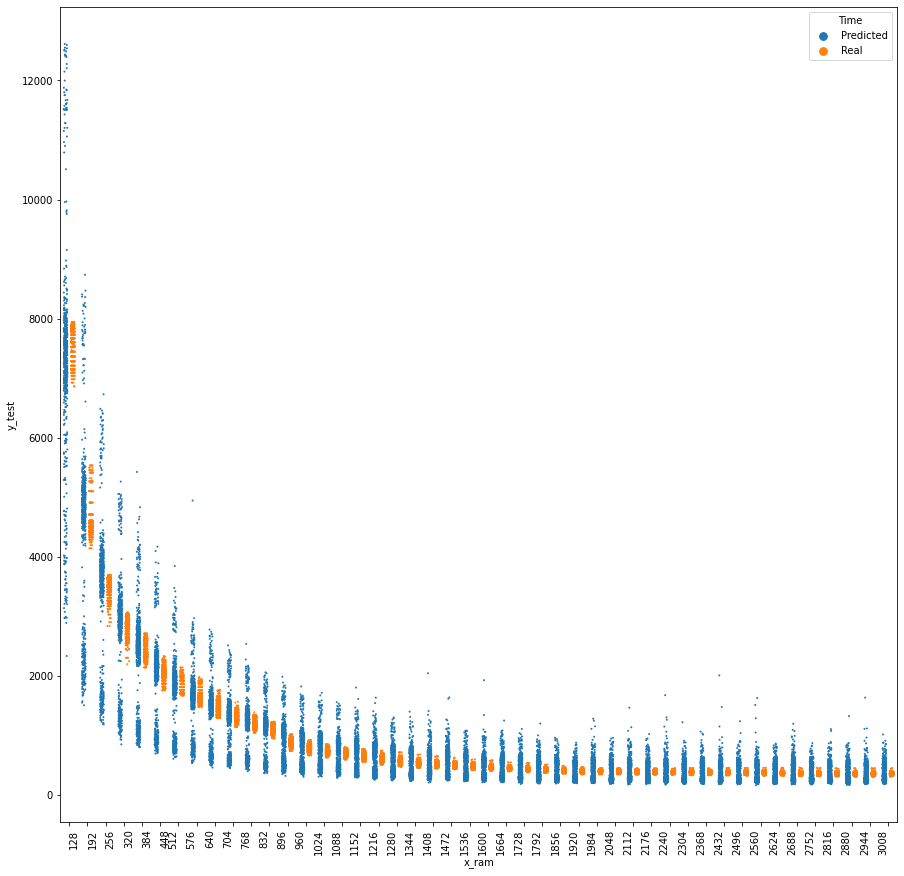

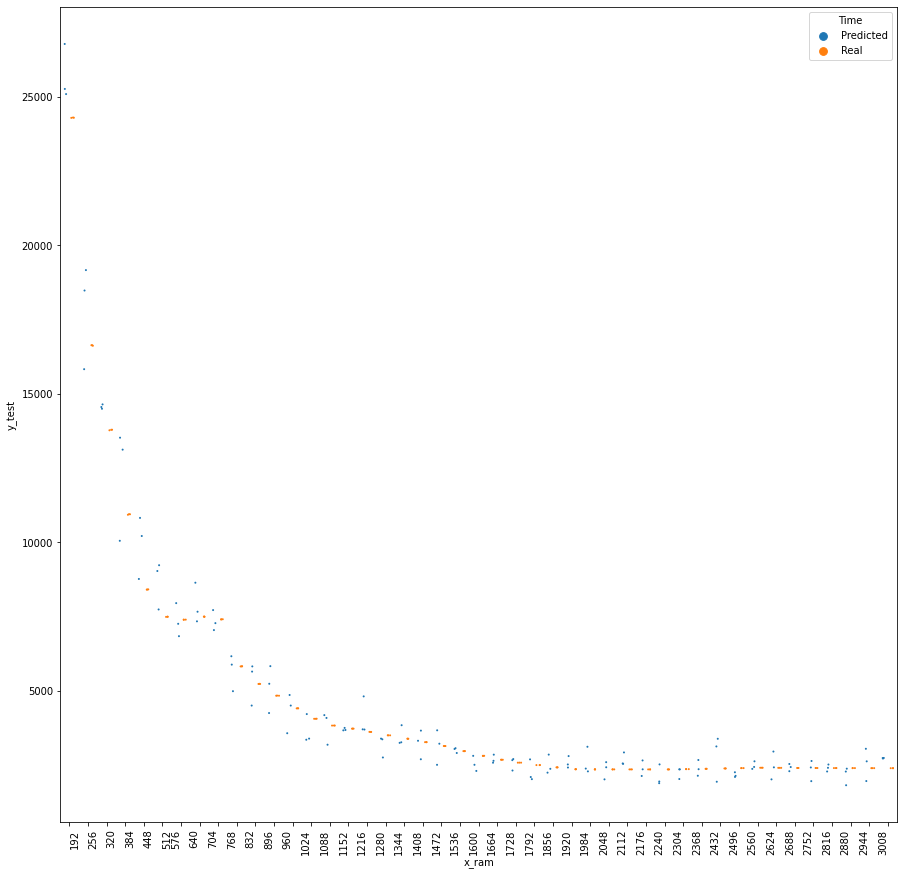

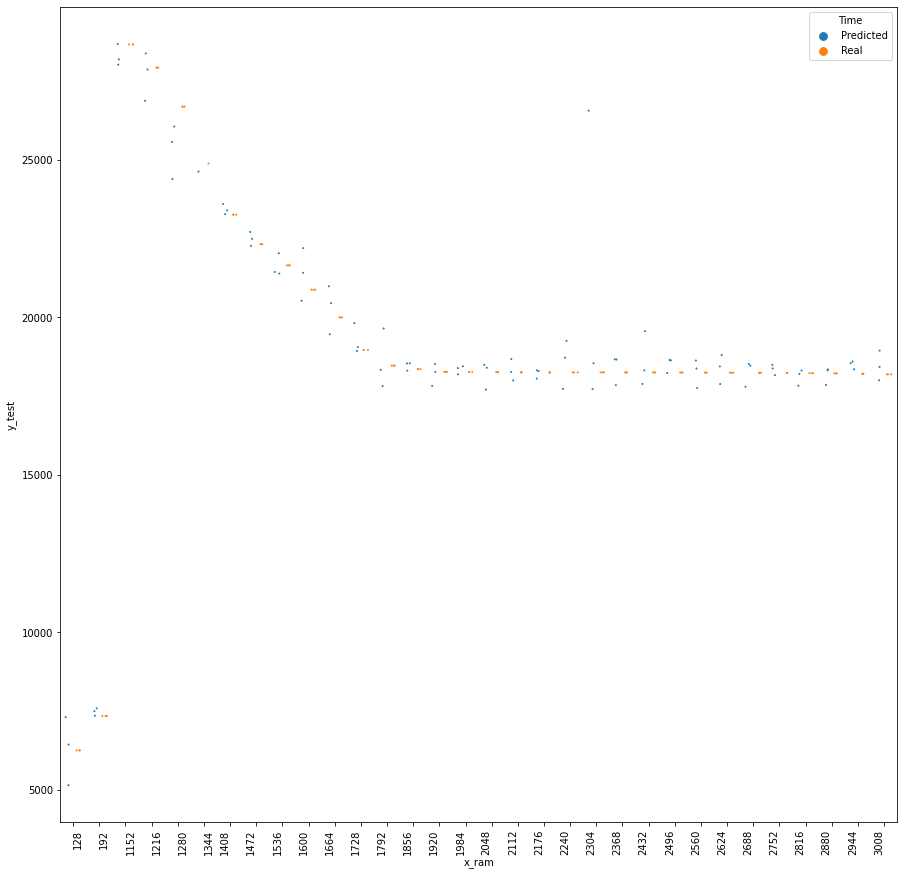

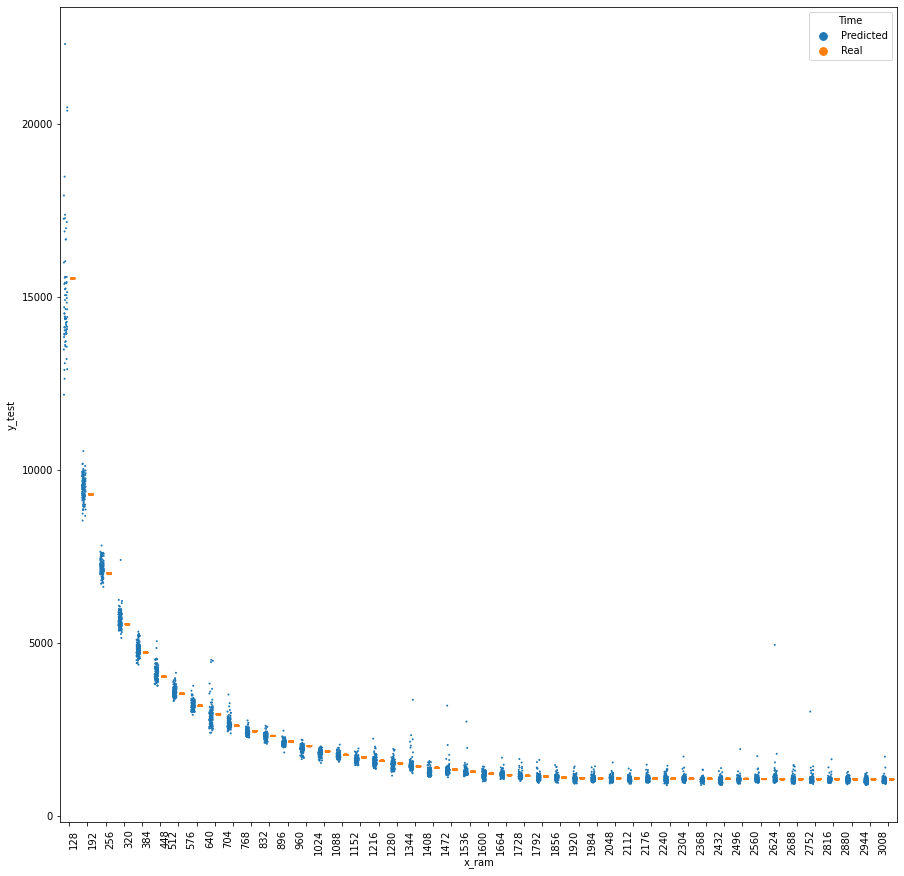

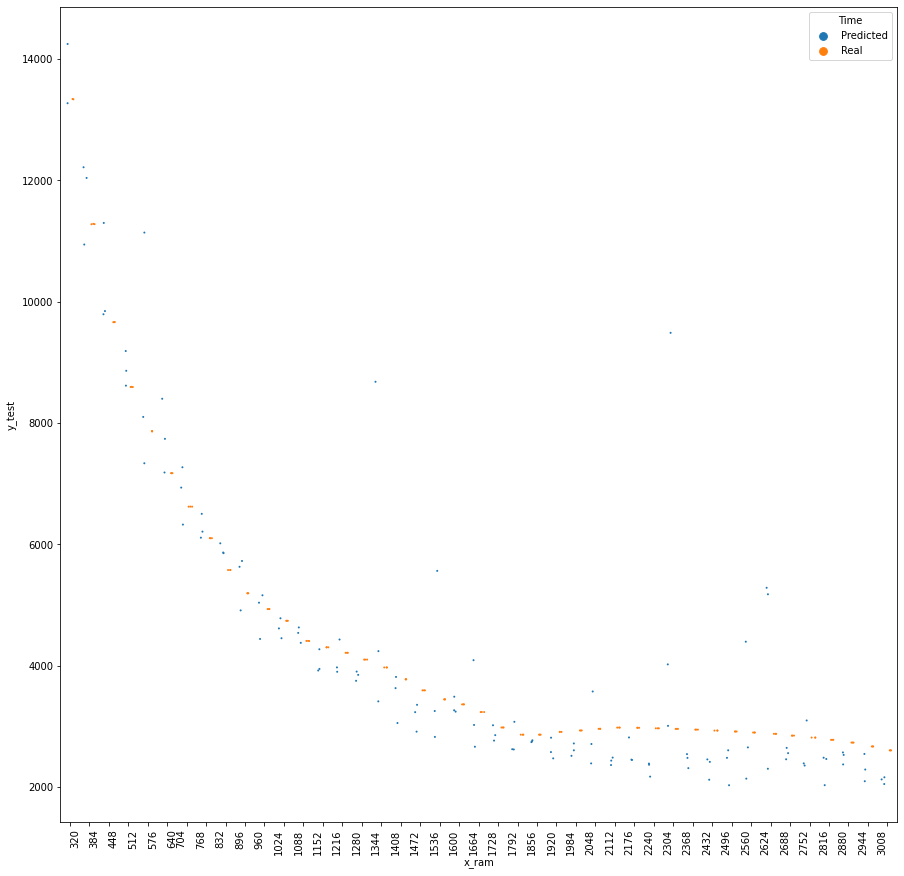

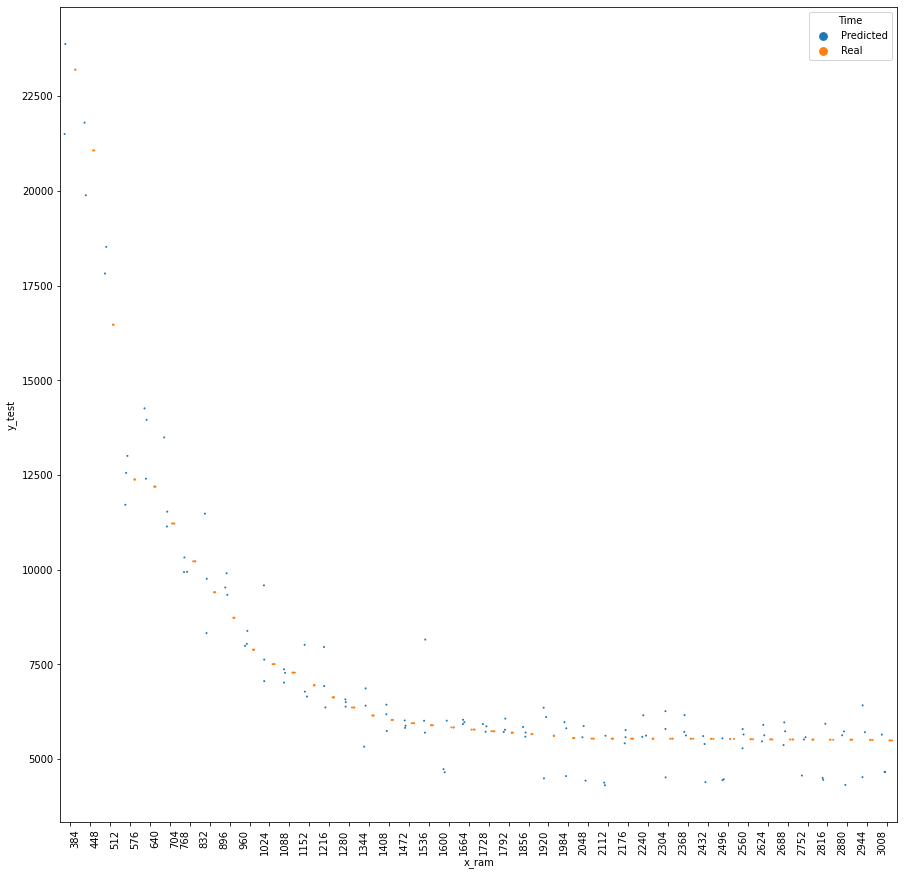

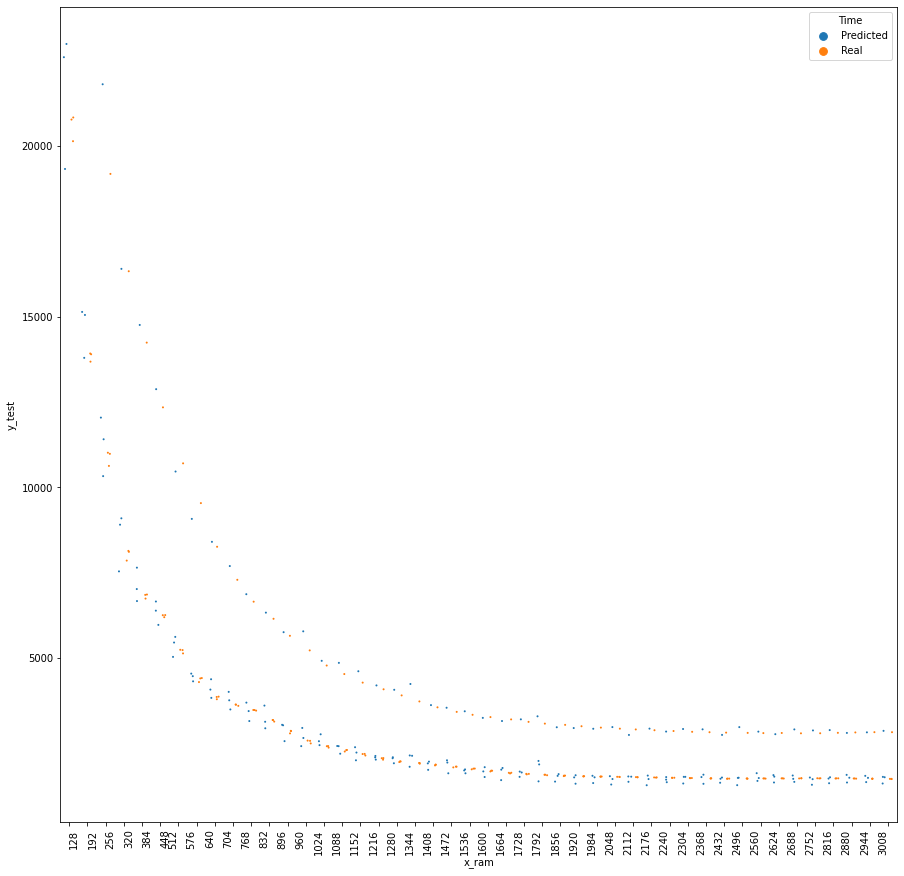

In [11]:
show_results(keras.models.load_model('./best-model-final-v4'), x, y)


MAE: 0.009113001
MSE: 0.00030222427
RMSE: 0.017384598
R2 SCORE: 0.9908794794942334


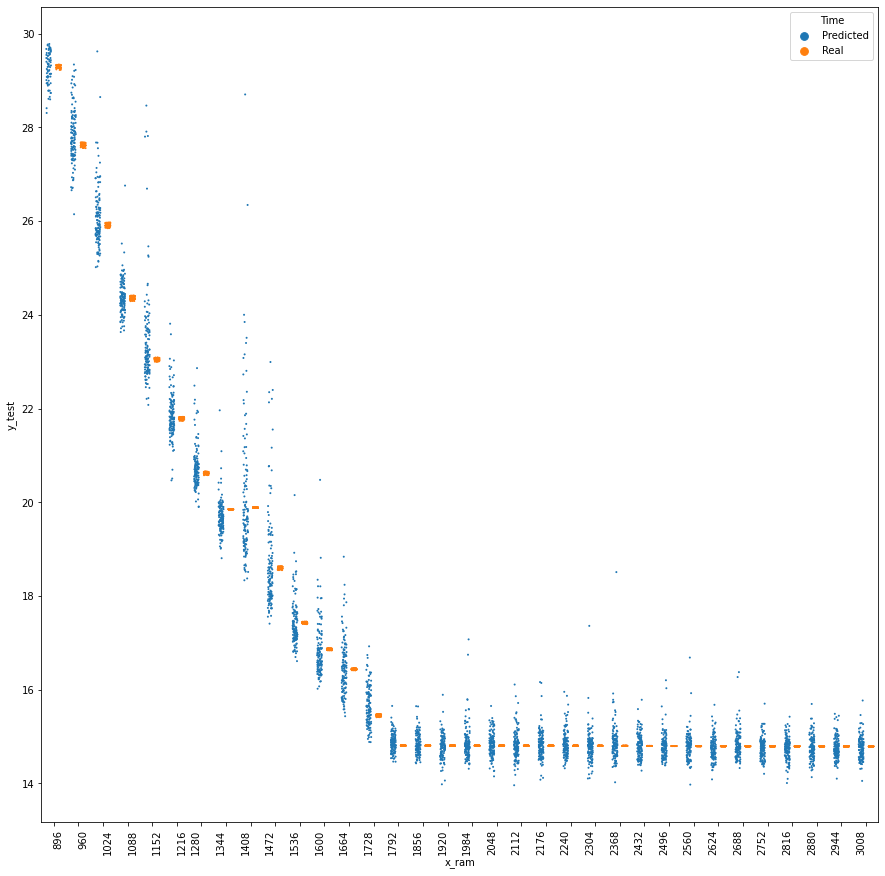

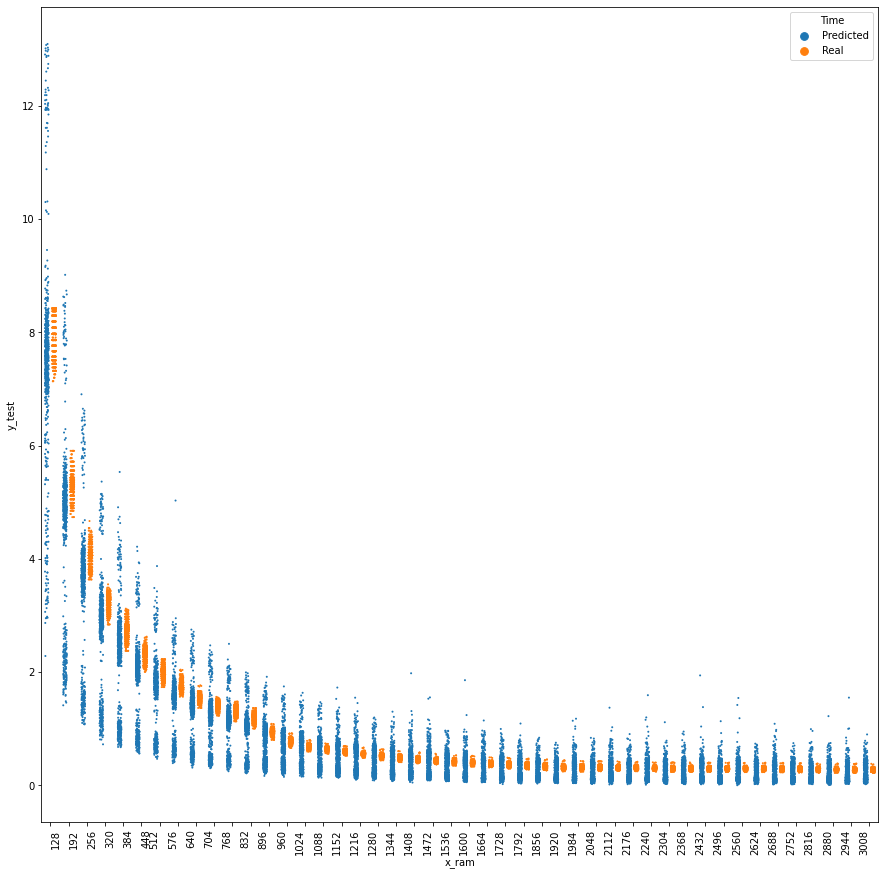

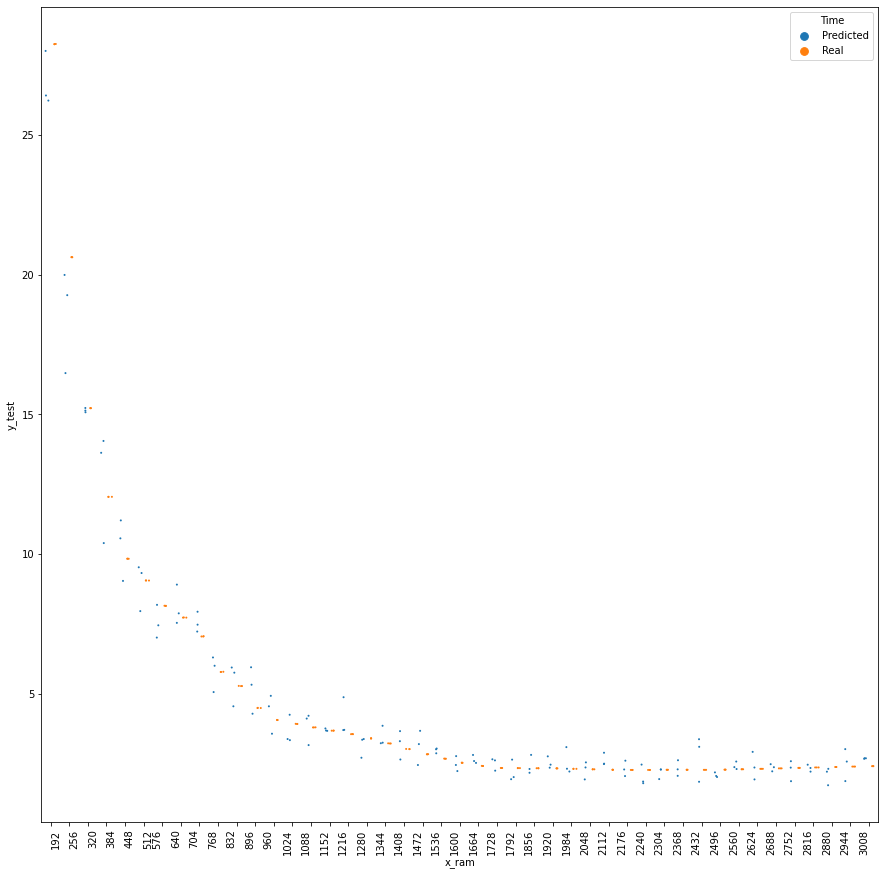

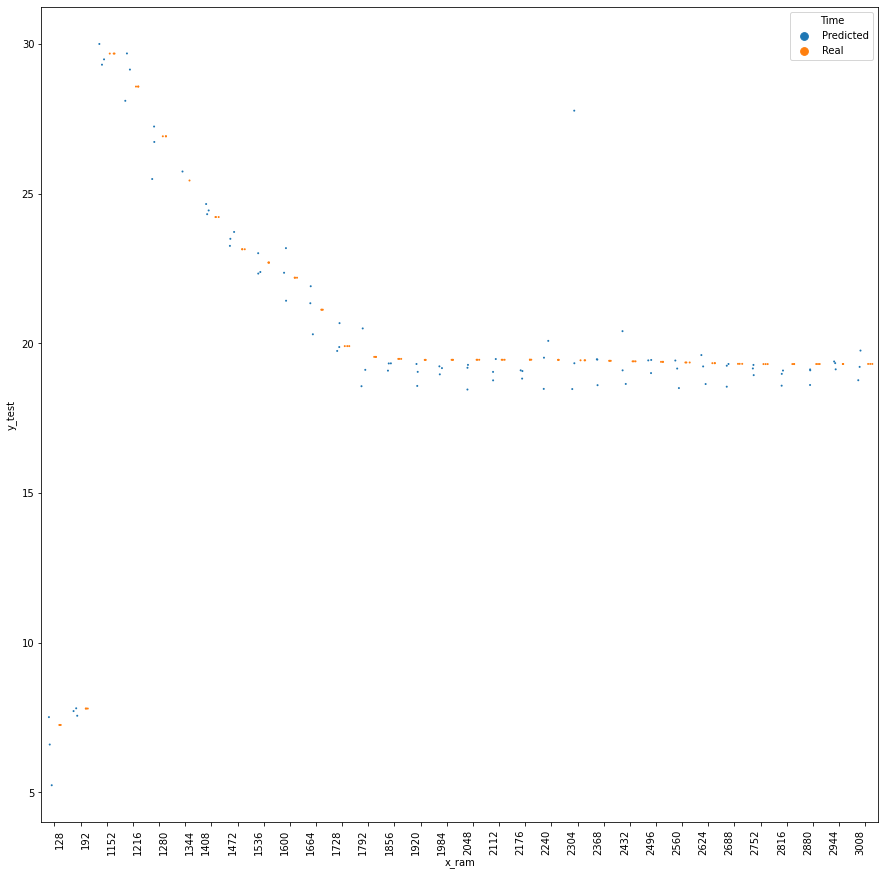

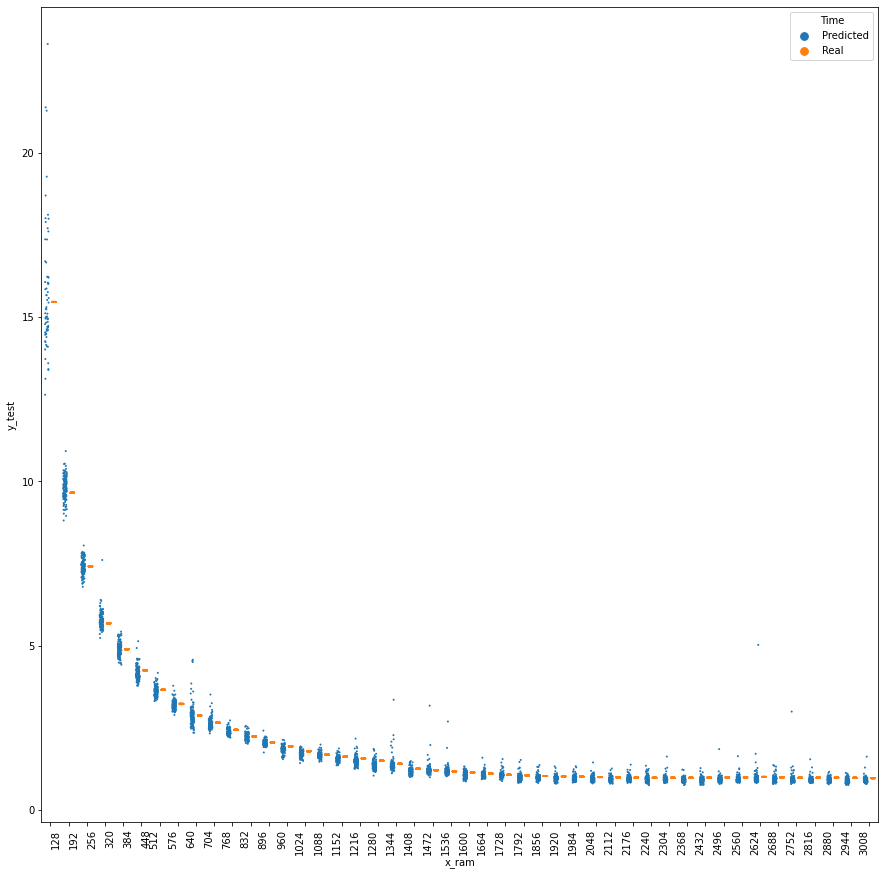

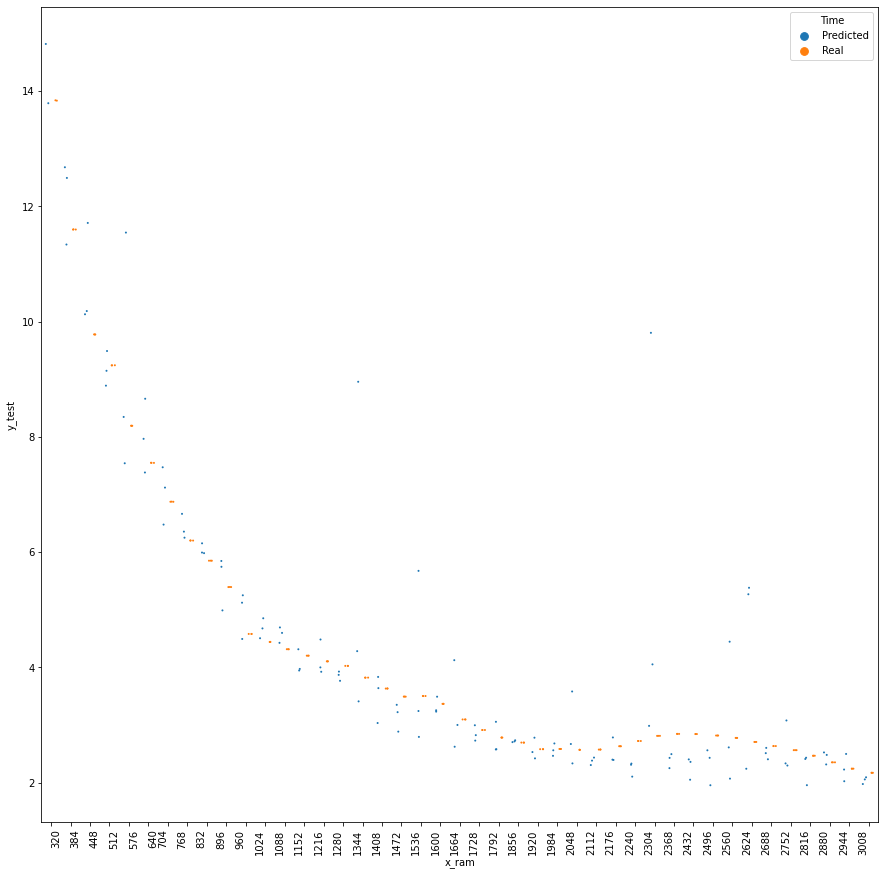

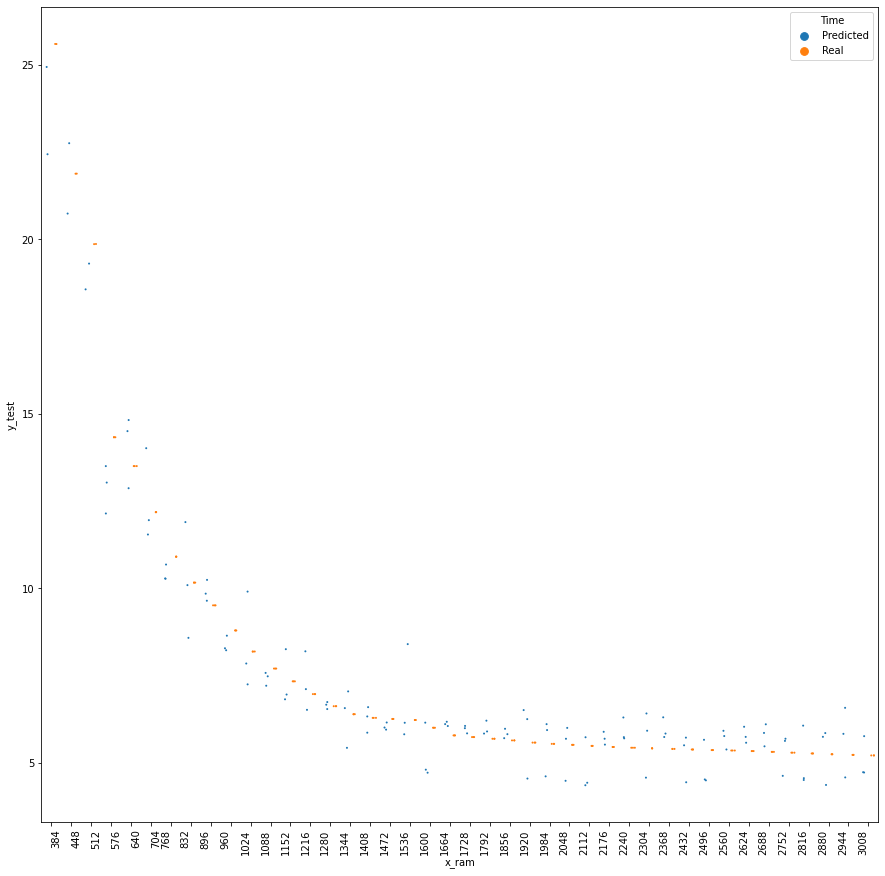

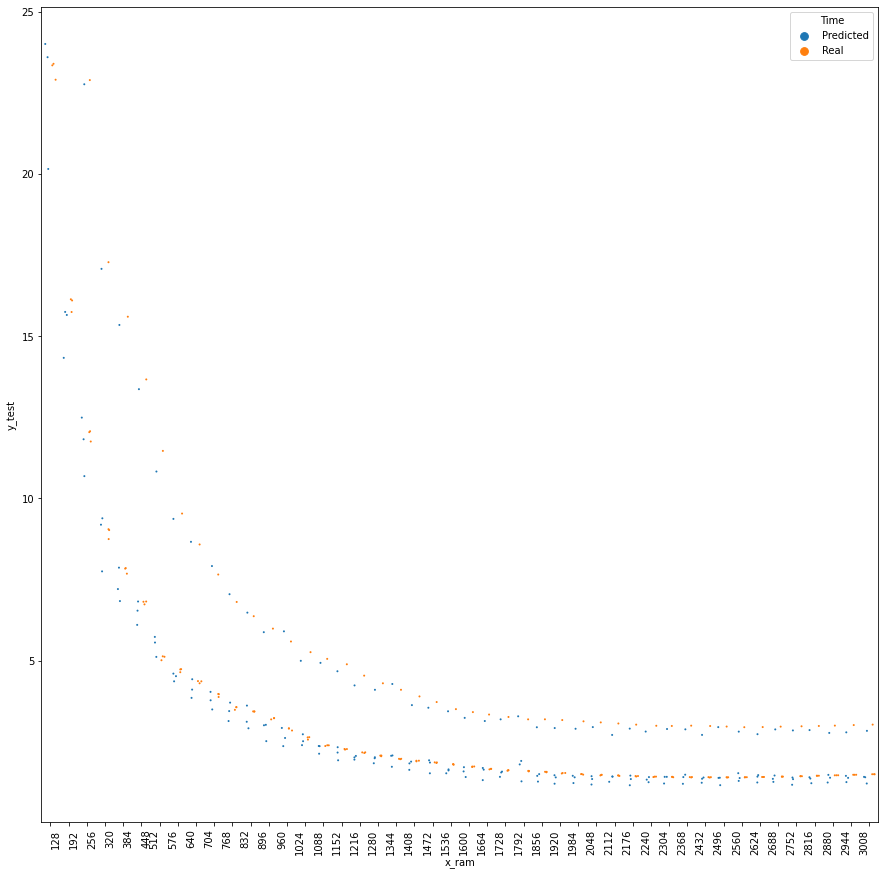

In [11]:
show_results(keras.models.load_model('./best-model-hyperflow-v3'), x, y)


MAE: 0.007747617
MSE: 0.00016938757
RMSE: 0.013014898
R2 SCORE: 0.9949966909646446


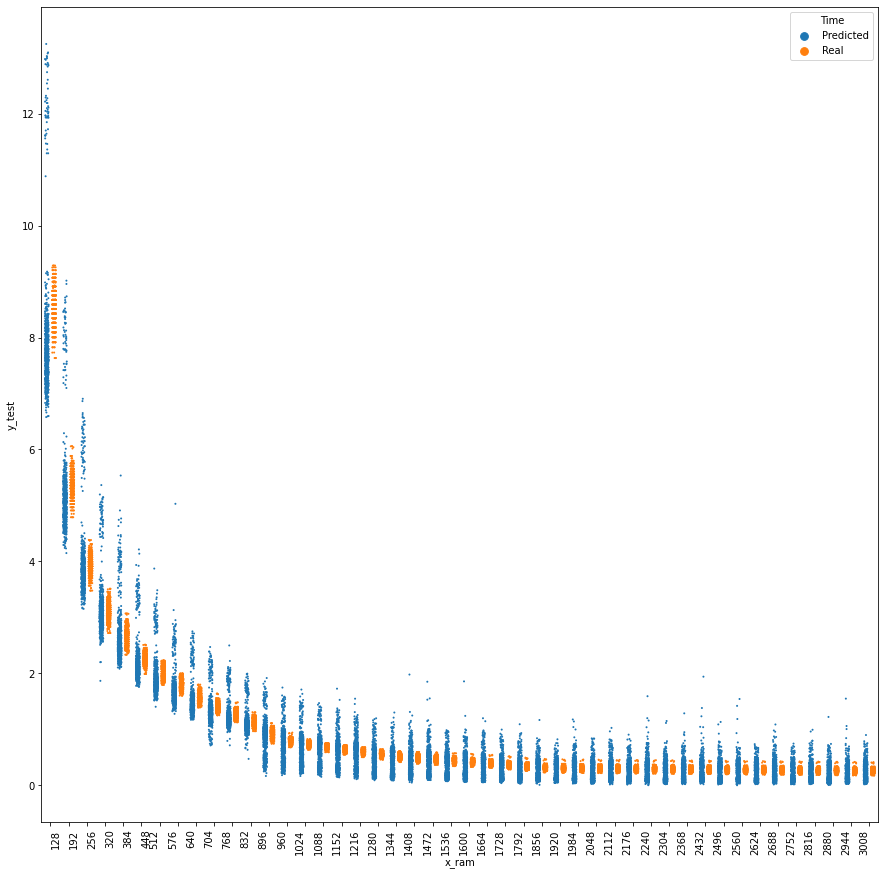

In [60]:
show_results(tf.keras.models.load_model('./best-model-hyperflow-v4'),  x, y)


MAE: 0.0068426854
MSE: 0.00015506466
RMSE: 0.012452496
R2 SCORE: 0.9953834911705852


<Figure size 720x720 with 0 Axes>

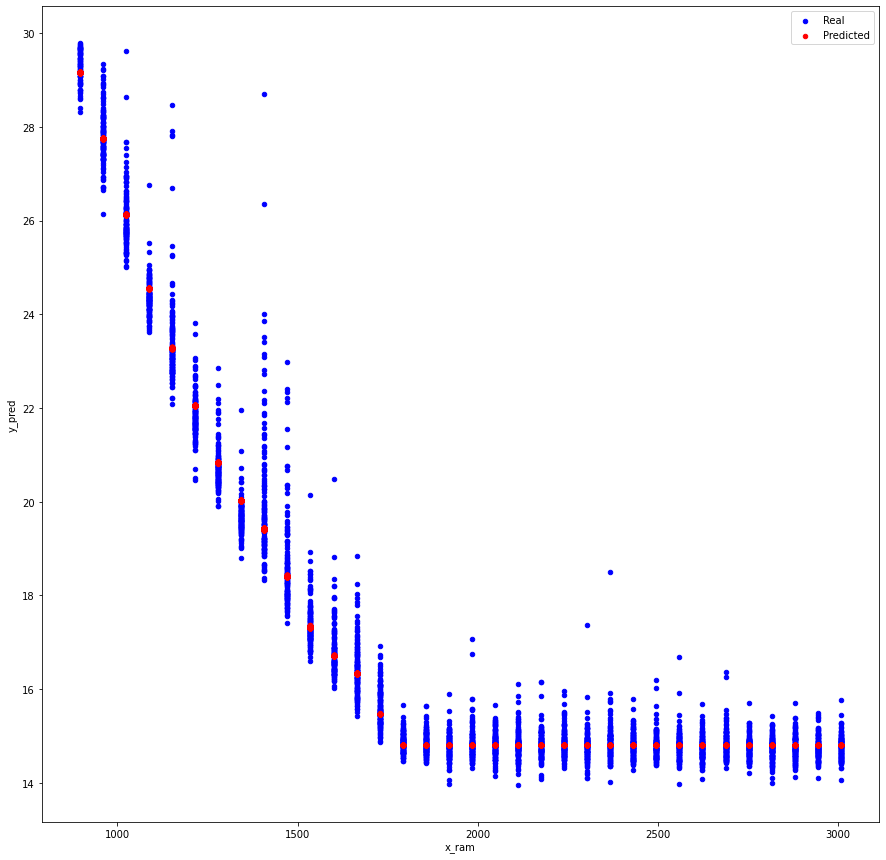

<Figure size 720x720 with 0 Axes>

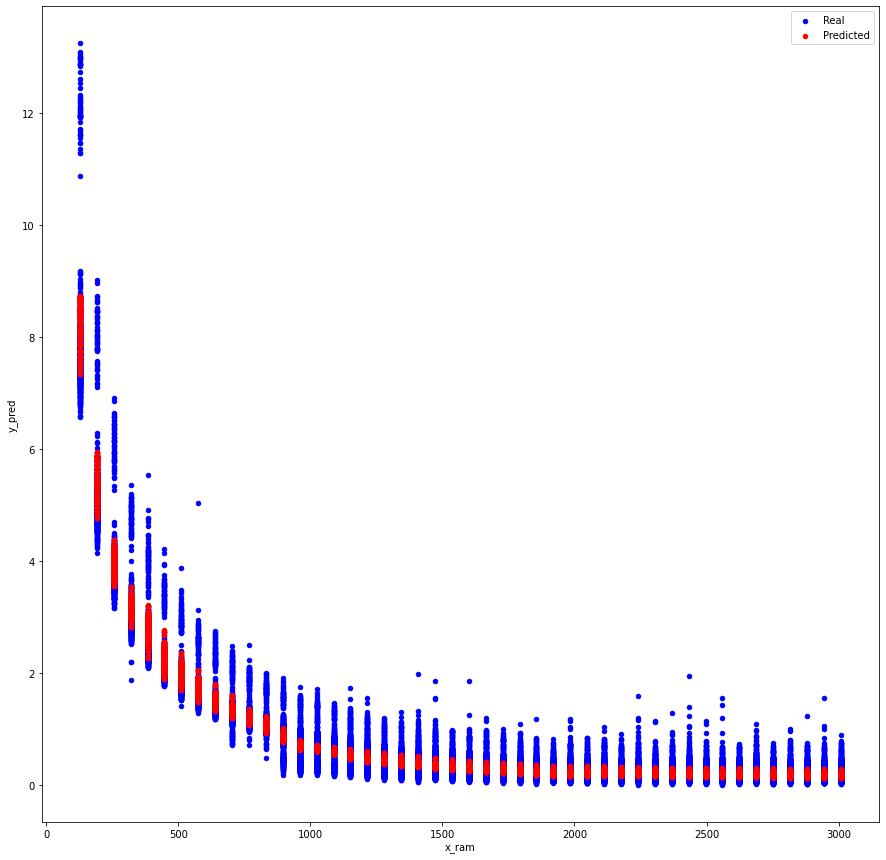

<Figure size 720x720 with 0 Axes>

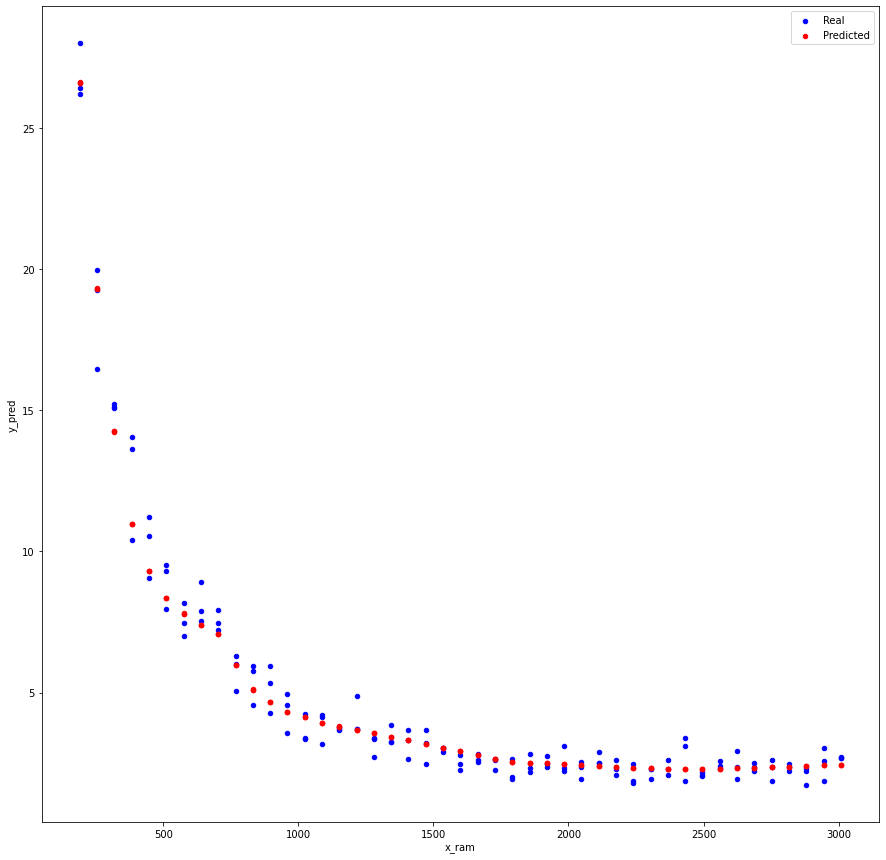

<Figure size 720x720 with 0 Axes>

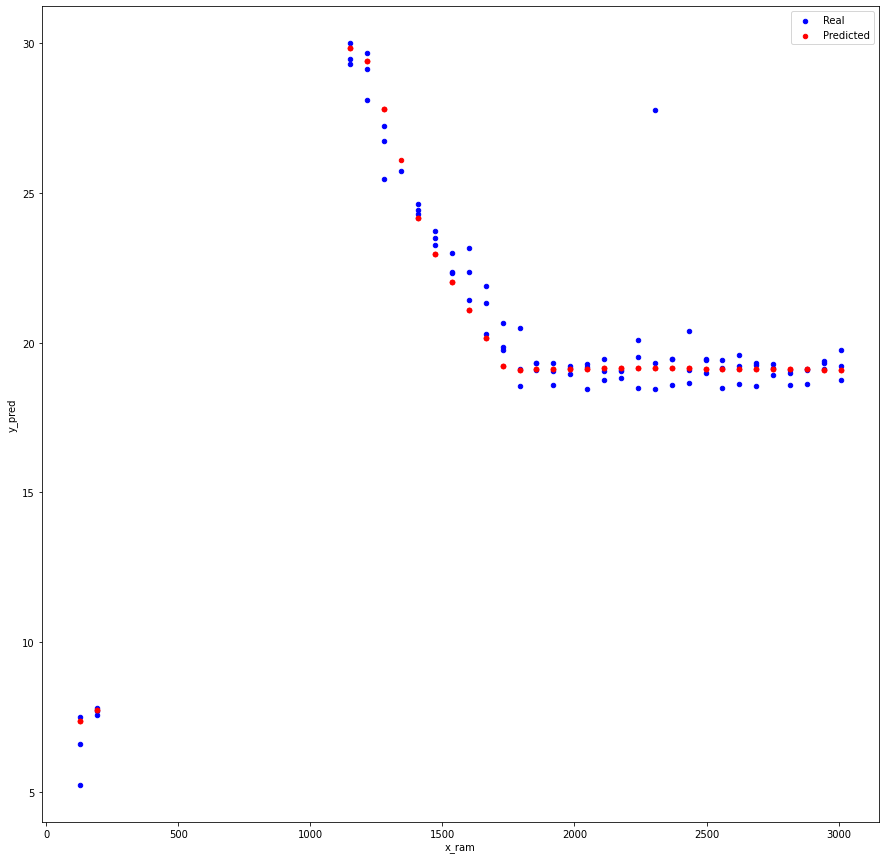

<Figure size 720x720 with 0 Axes>

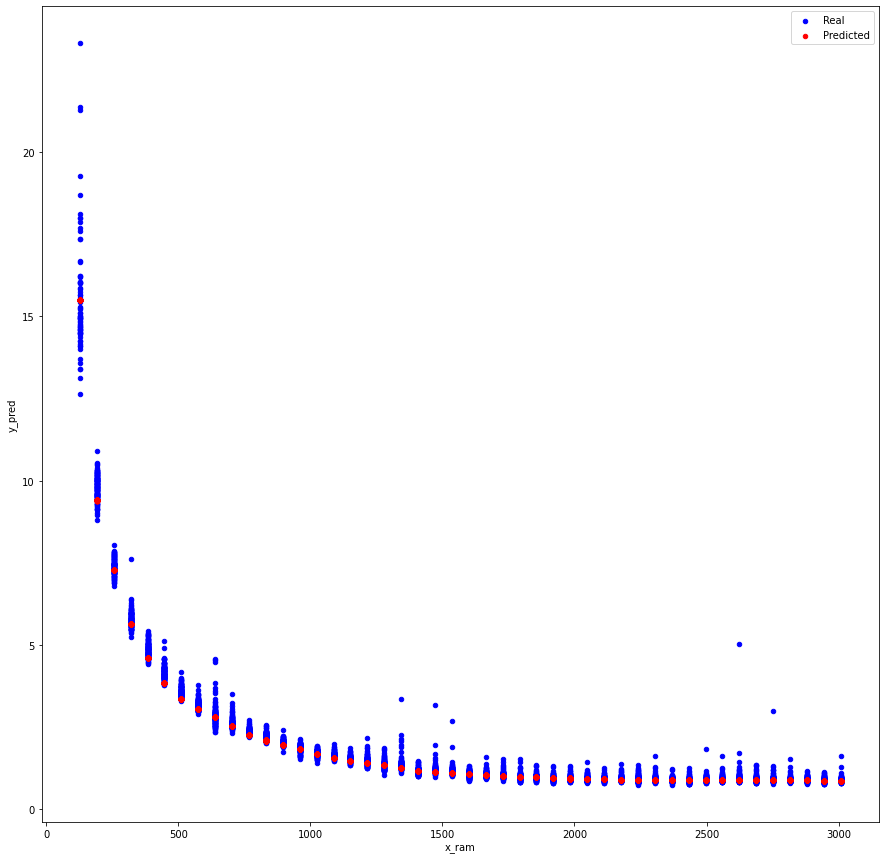

<Figure size 720x720 with 0 Axes>

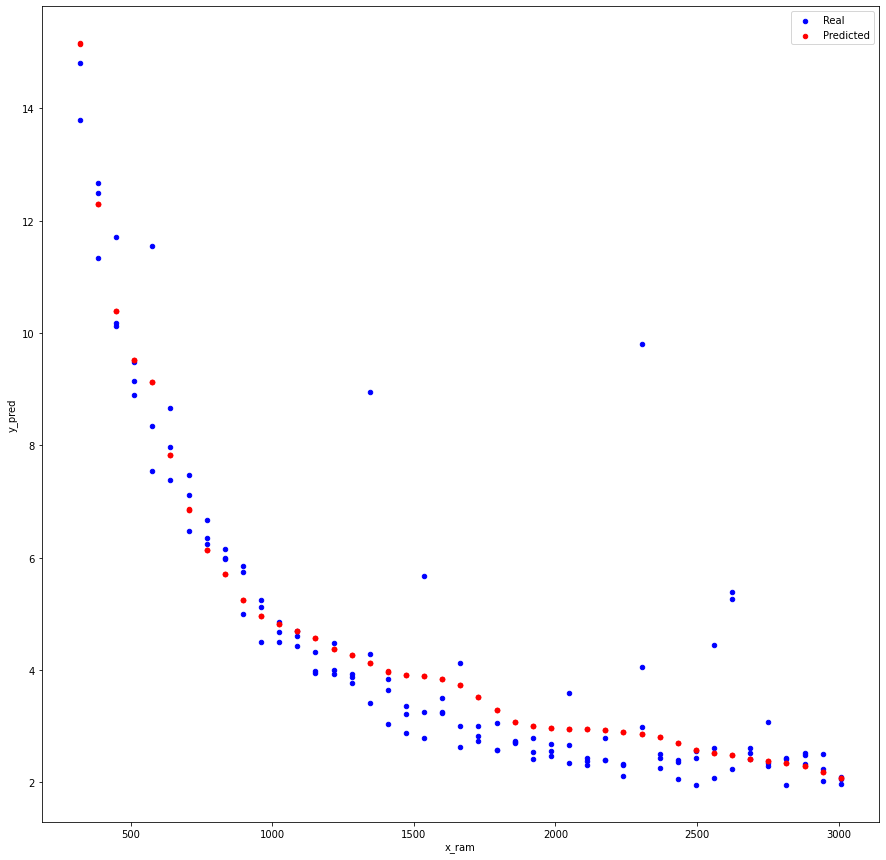

<Figure size 720x720 with 0 Axes>

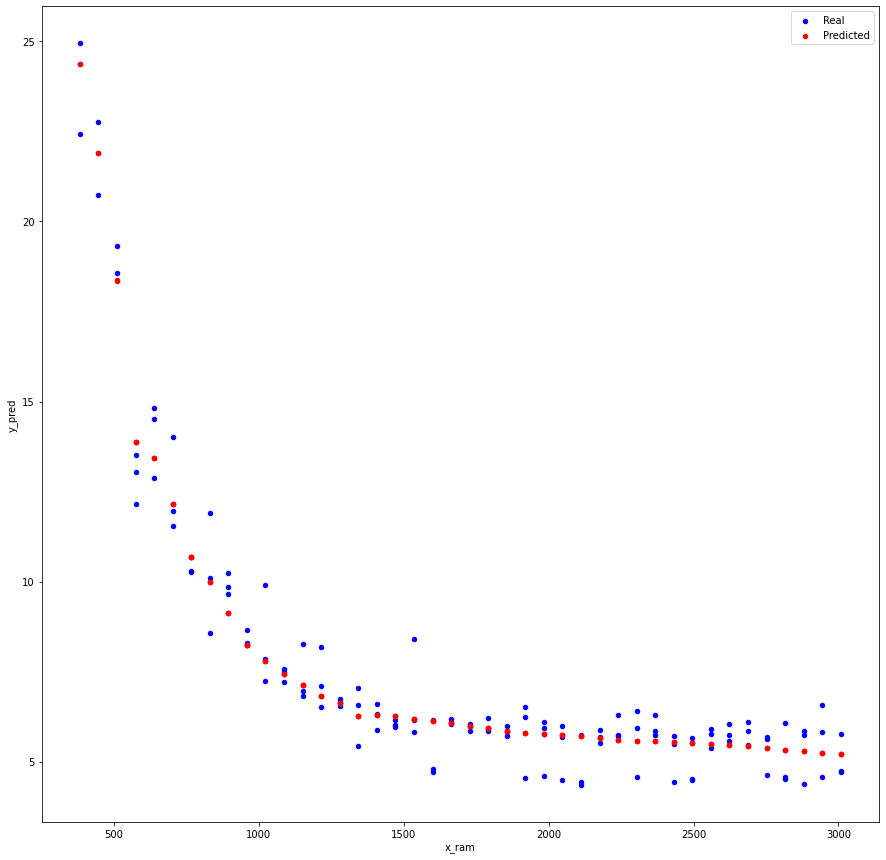

<Figure size 720x720 with 0 Axes>

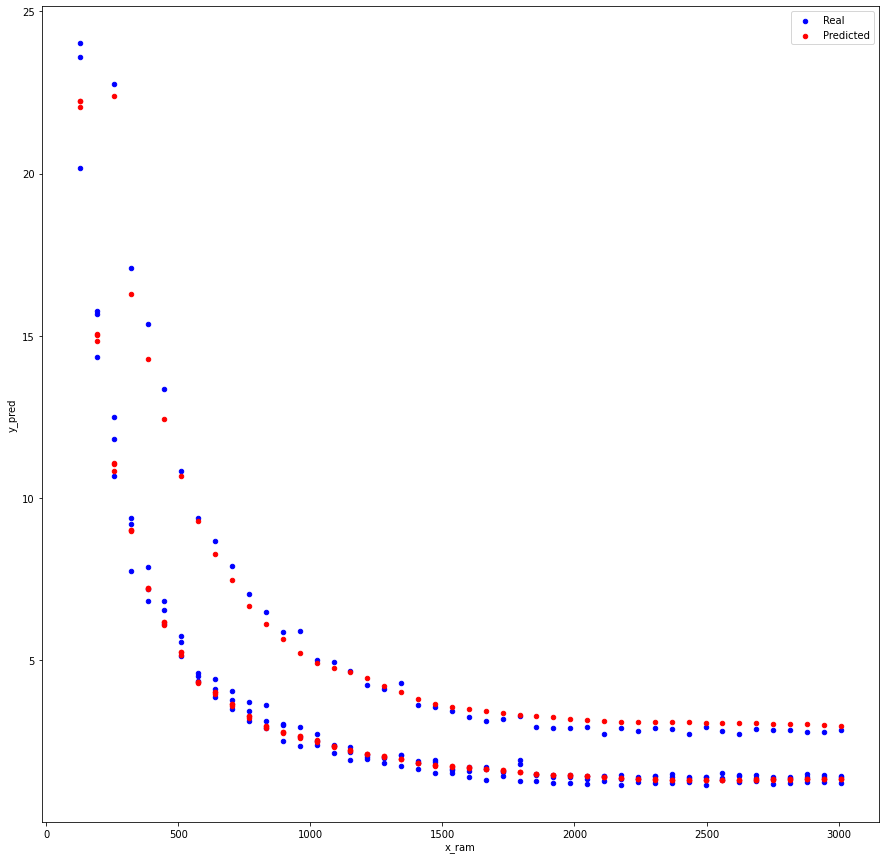

In [15]:
show_results(keras.models.load_model('./best-model-hyperflow'), x, y)


Execution 256 ram

MAE: 0.0054286877
MSE: 0.0001455743
RMSE: 0.012065418
R2 SCORE: 0.9956316177300188


<Figure size 720x720 with 0 Axes>

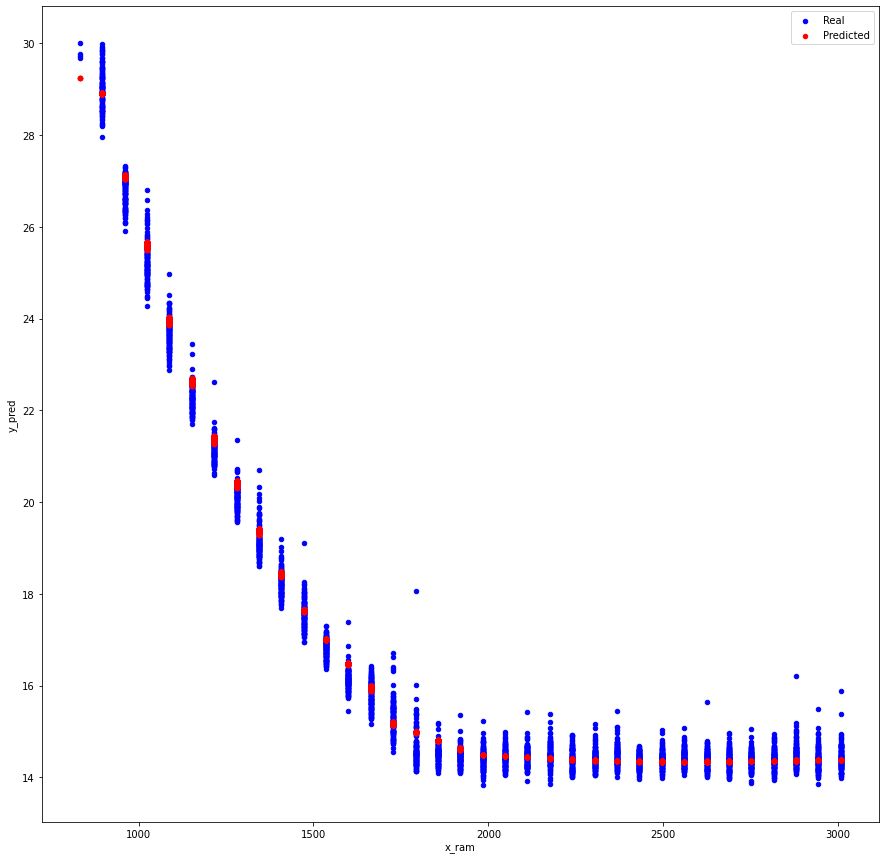

<Figure size 720x720 with 0 Axes>

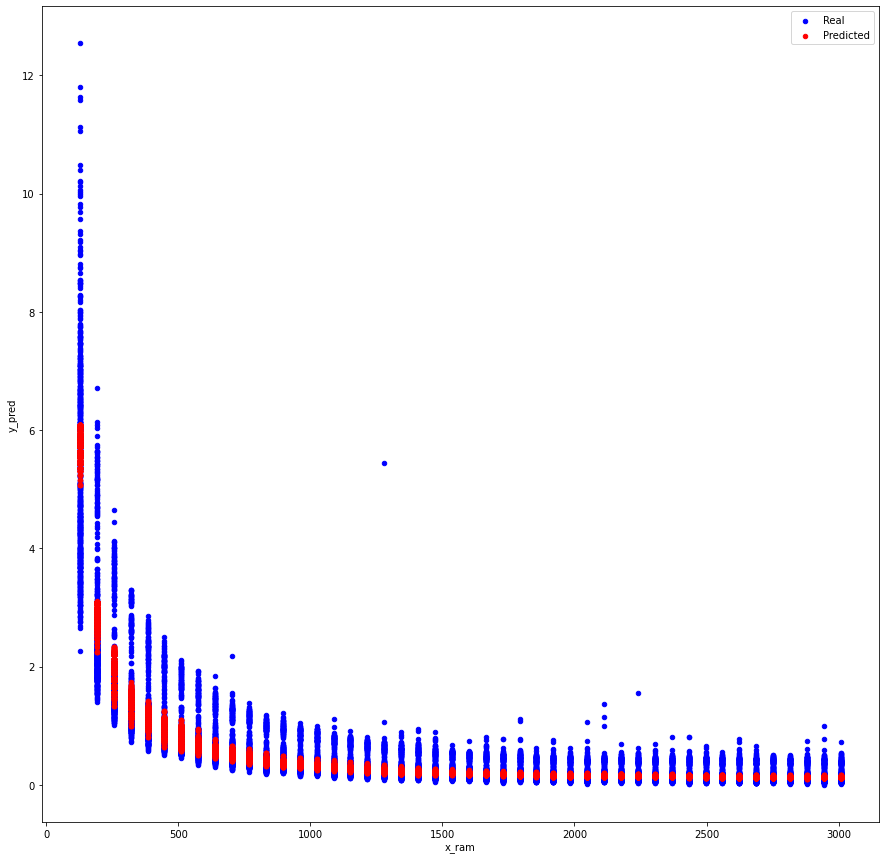

<Figure size 720x720 with 0 Axes>

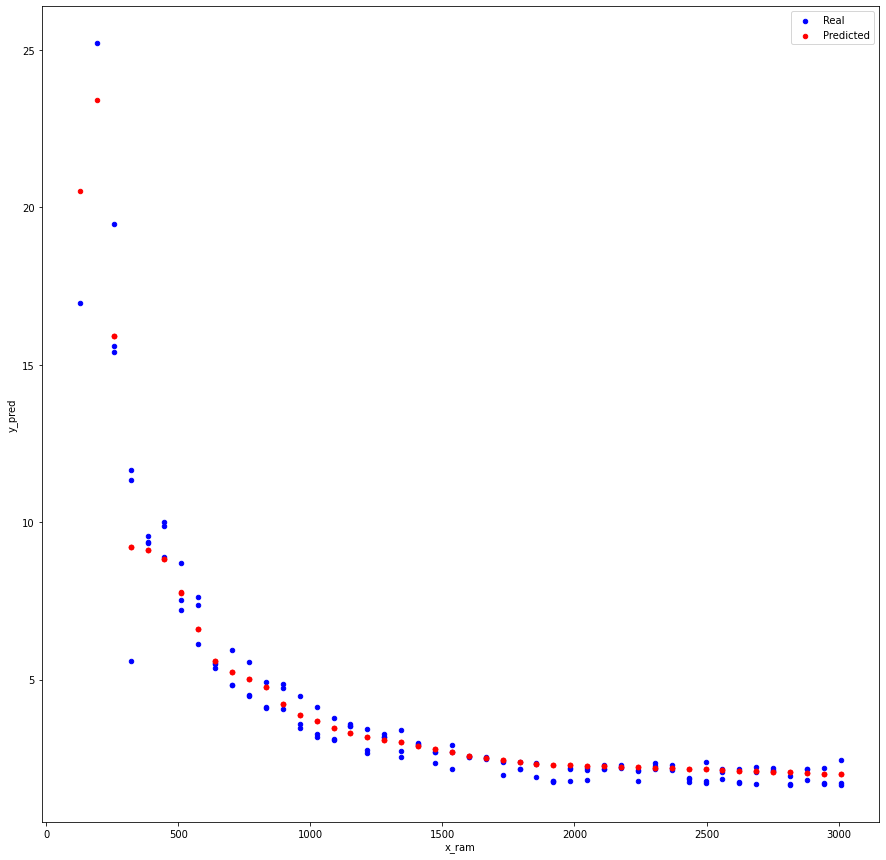

<Figure size 720x720 with 0 Axes>

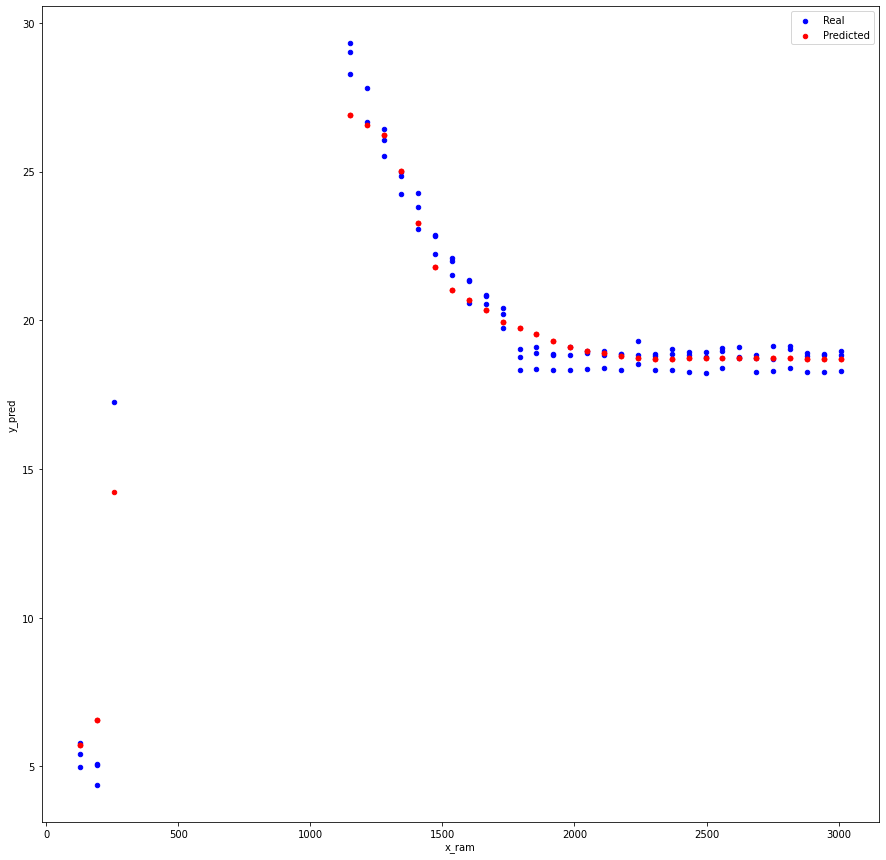

<Figure size 720x720 with 0 Axes>

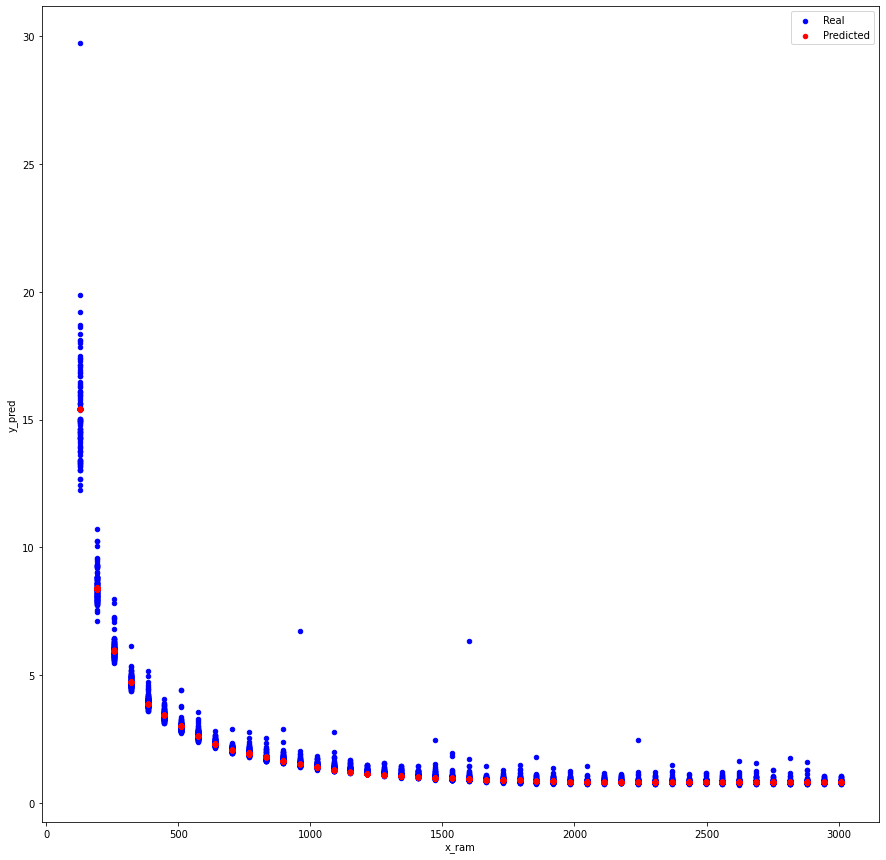

<Figure size 720x720 with 0 Axes>

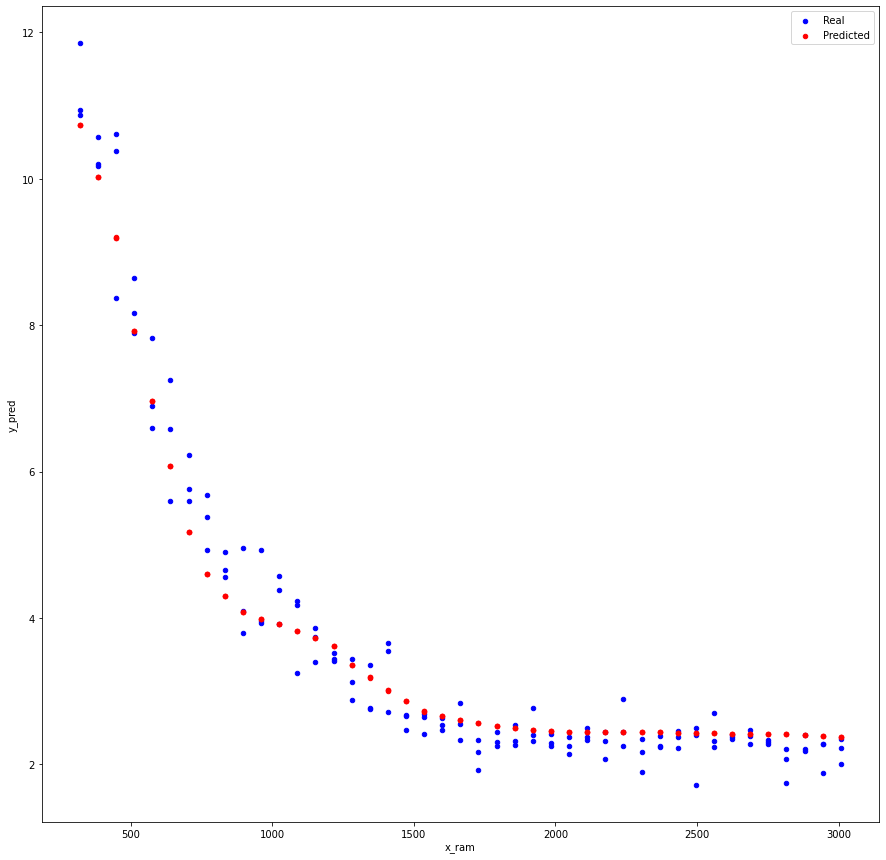

<Figure size 720x720 with 0 Axes>

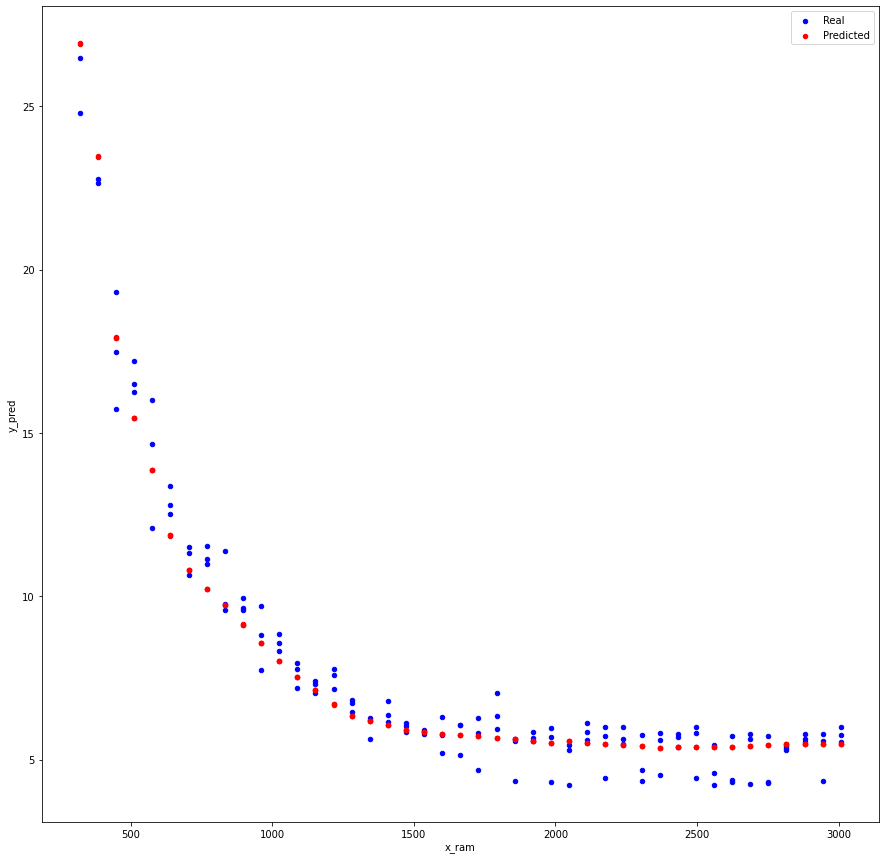

<Figure size 720x720 with 0 Axes>

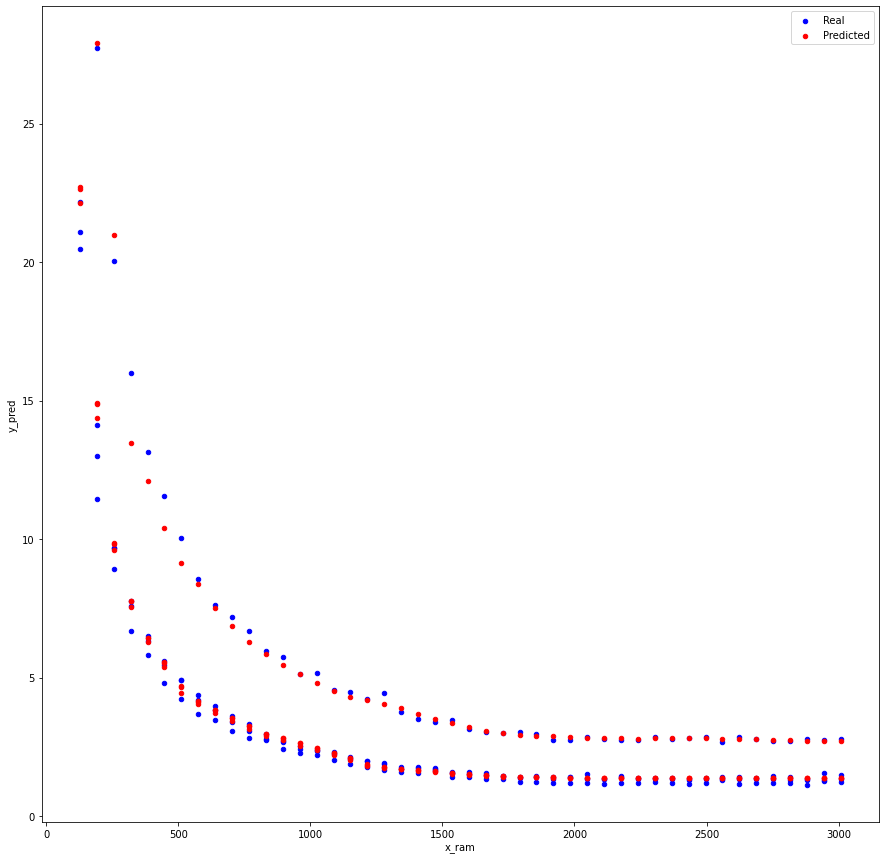

In [65]:
show_results(keras.models.load_model('./best-256-run-normalized'), x, y)


Execution of montage 0.35 every 128 ram

MAE: 0.0056759217
MSE: 0.00014544511
RMSE: 0.012060063
R2 SCORE: 0.9956422654152643


<Figure size 720x720 with 0 Axes>

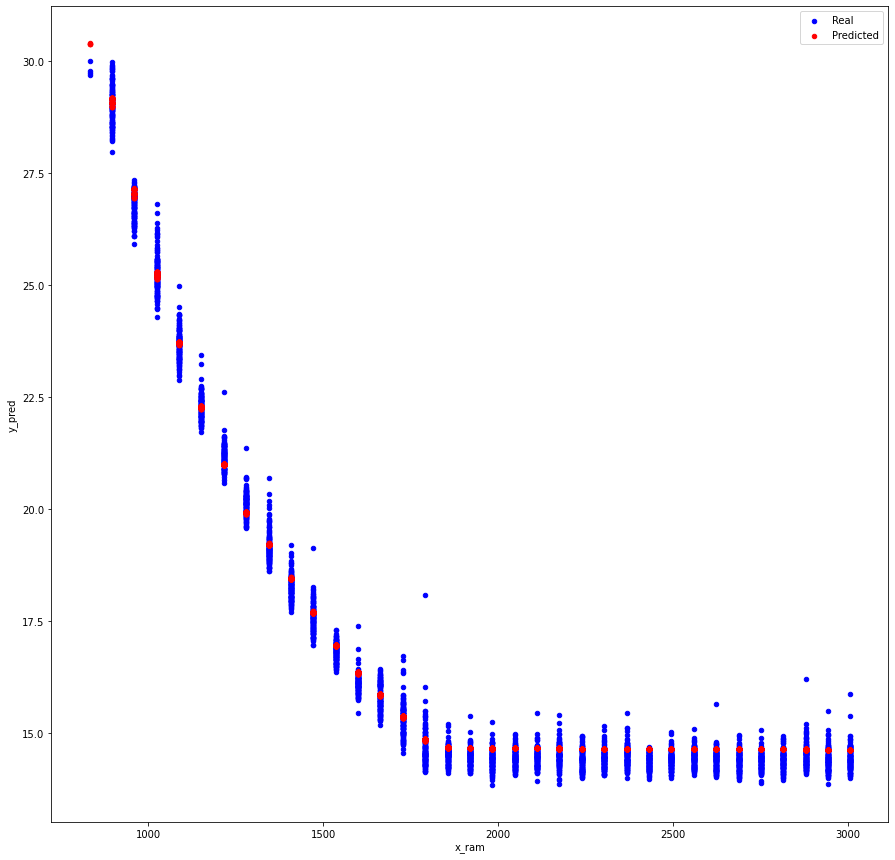

<Figure size 720x720 with 0 Axes>

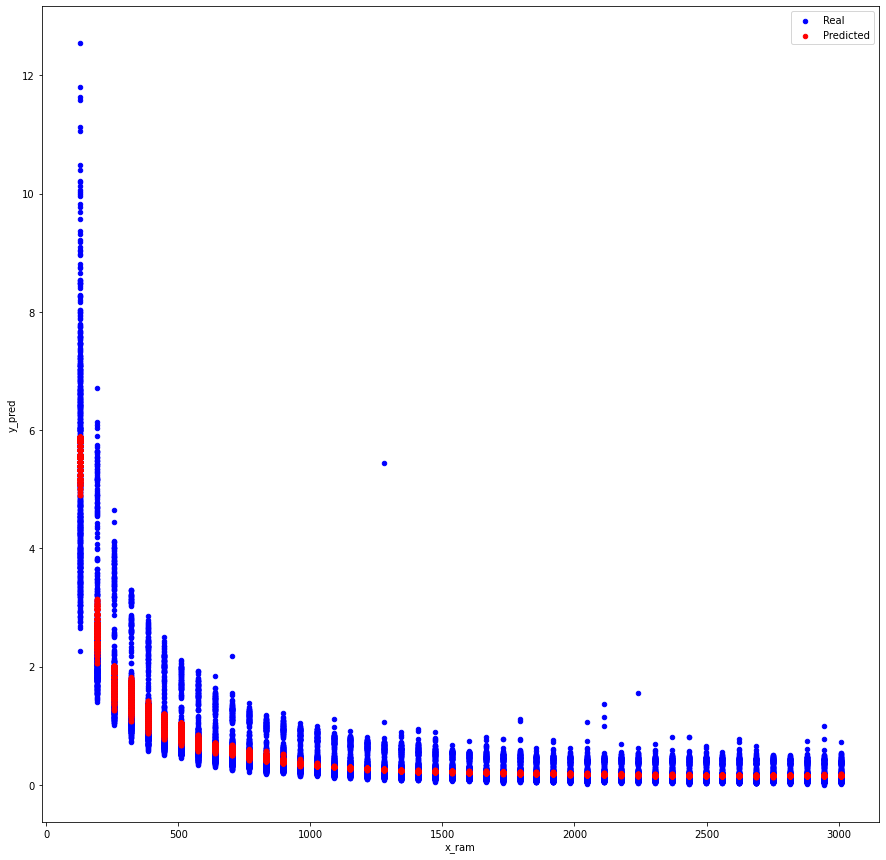

<Figure size 720x720 with 0 Axes>

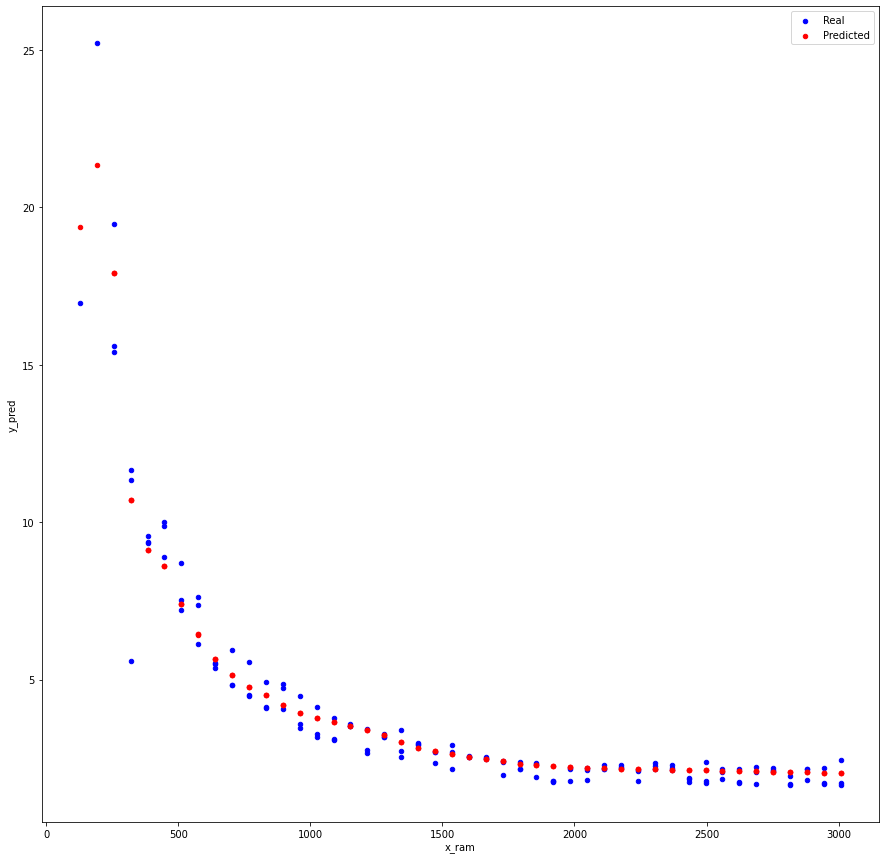

<Figure size 720x720 with 0 Axes>

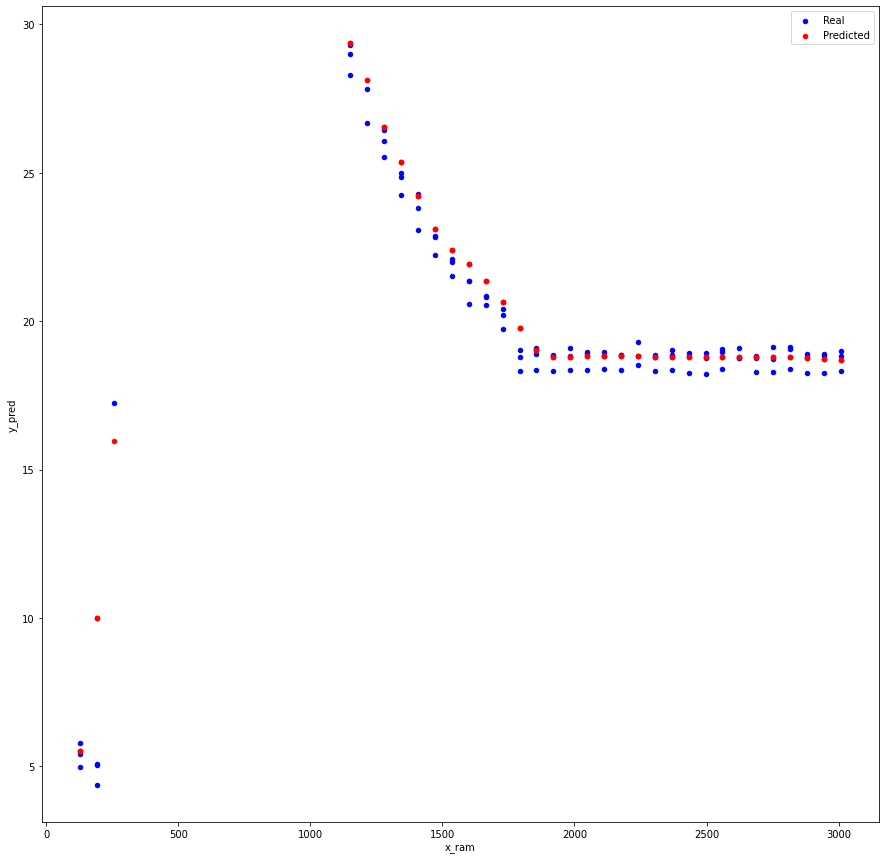

<Figure size 720x720 with 0 Axes>

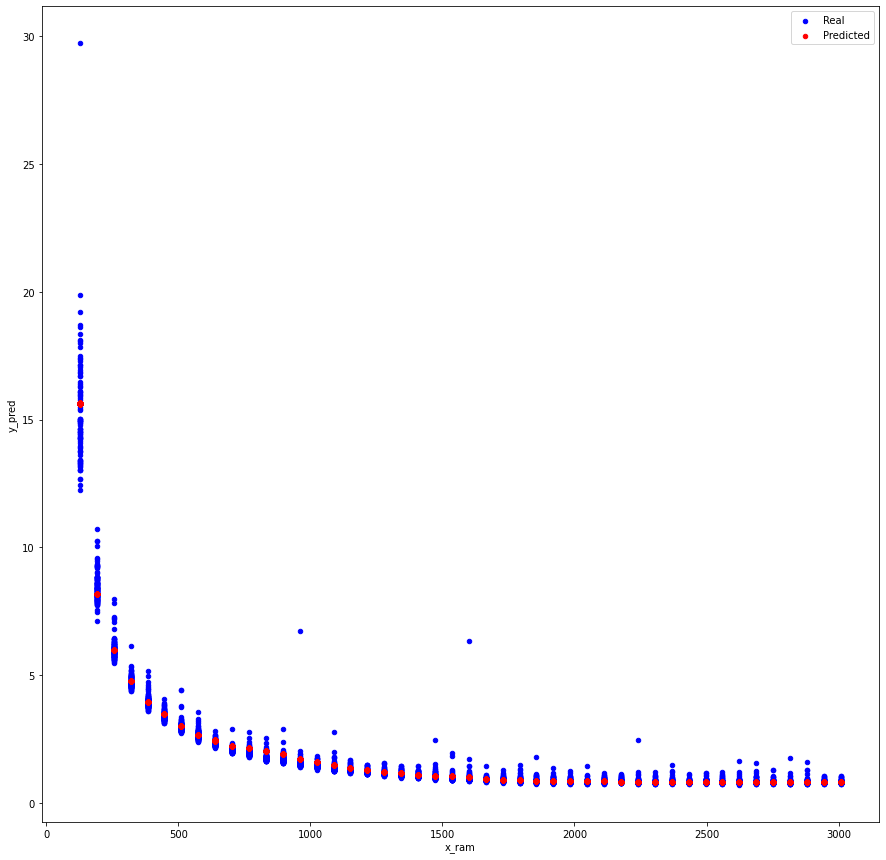

<Figure size 720x720 with 0 Axes>

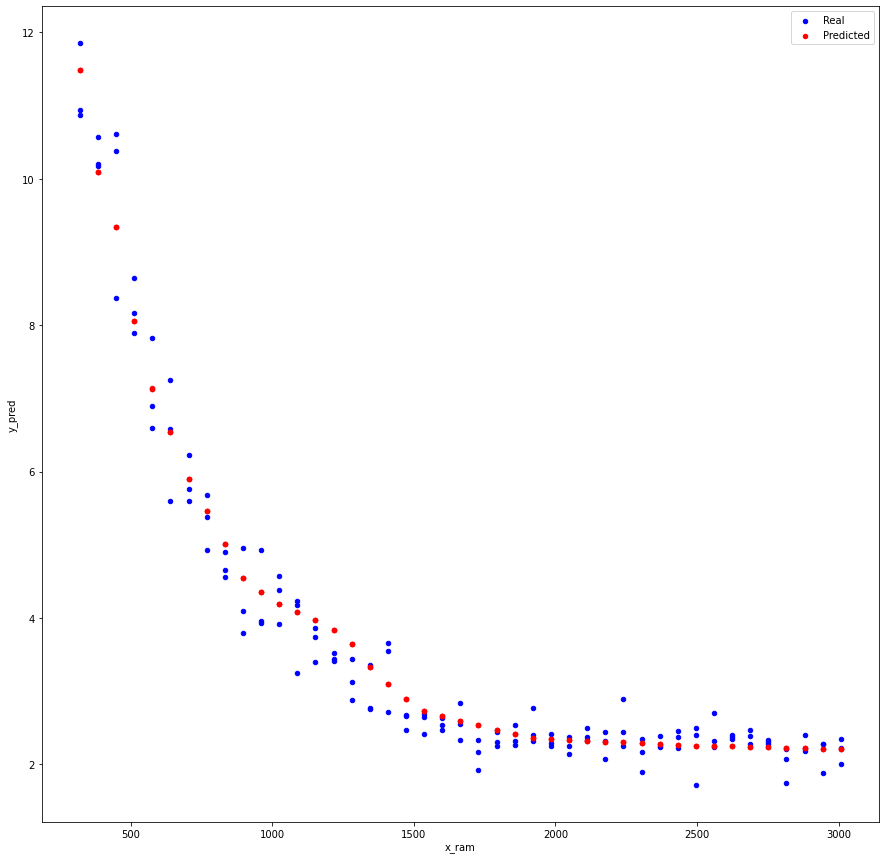

<Figure size 720x720 with 0 Axes>

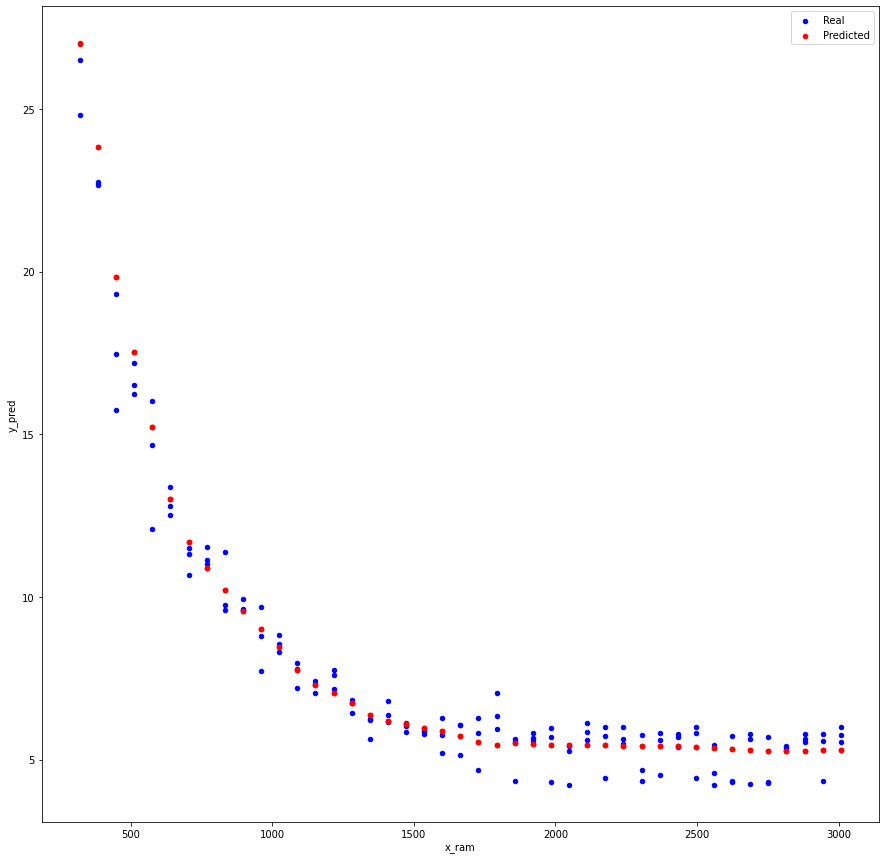

<Figure size 720x720 with 0 Axes>

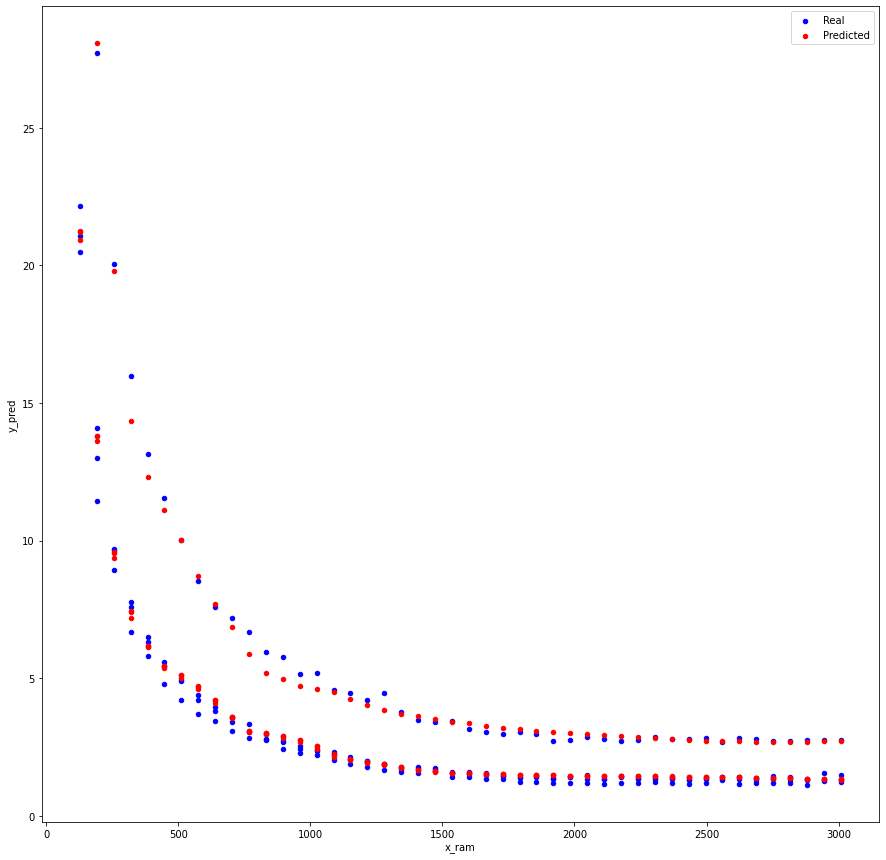

In [66]:
show_results(keras.models.load_model('./best-half-run-normalized'), x, y)


One whole execution of montage 0.35 every 64 ram

MAE: 0.0053284685
MSE: 0.00014065931
RMSE: 0.011859988
R2 SCORE: 0.995724580180179


<Figure size 720x720 with 0 Axes>

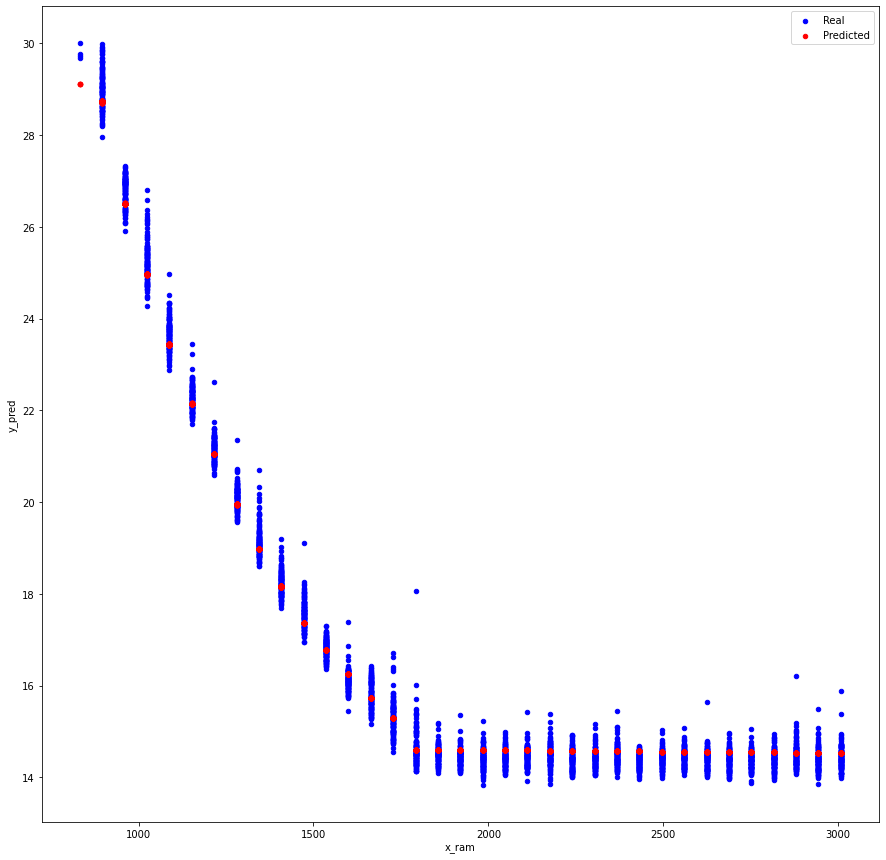

<Figure size 720x720 with 0 Axes>

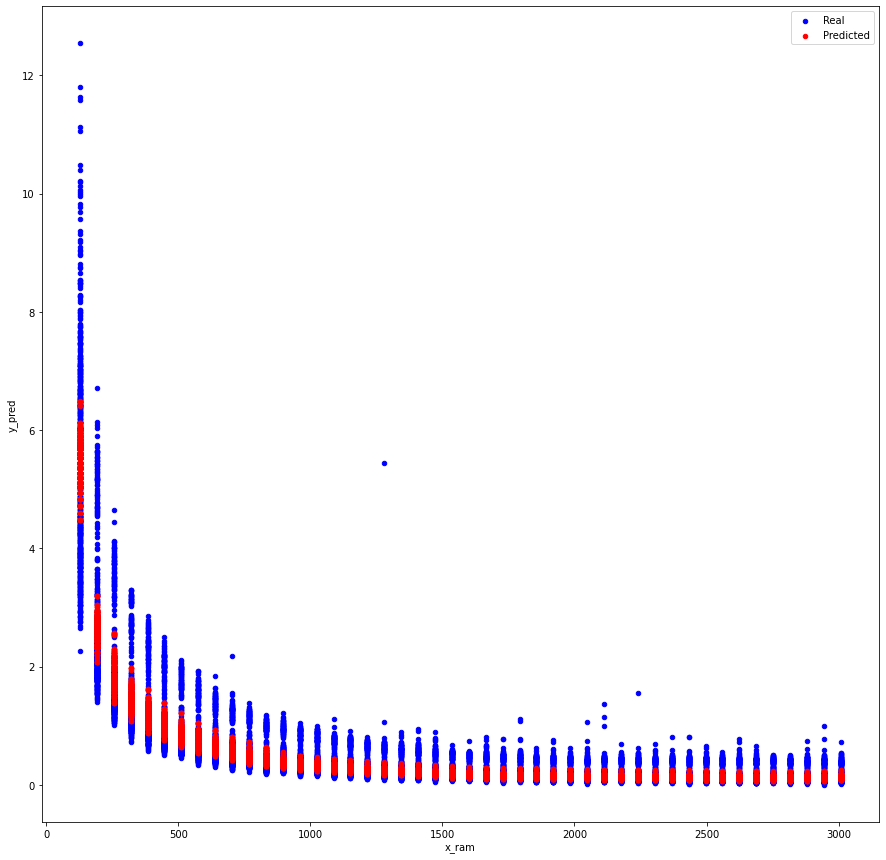

<Figure size 720x720 with 0 Axes>

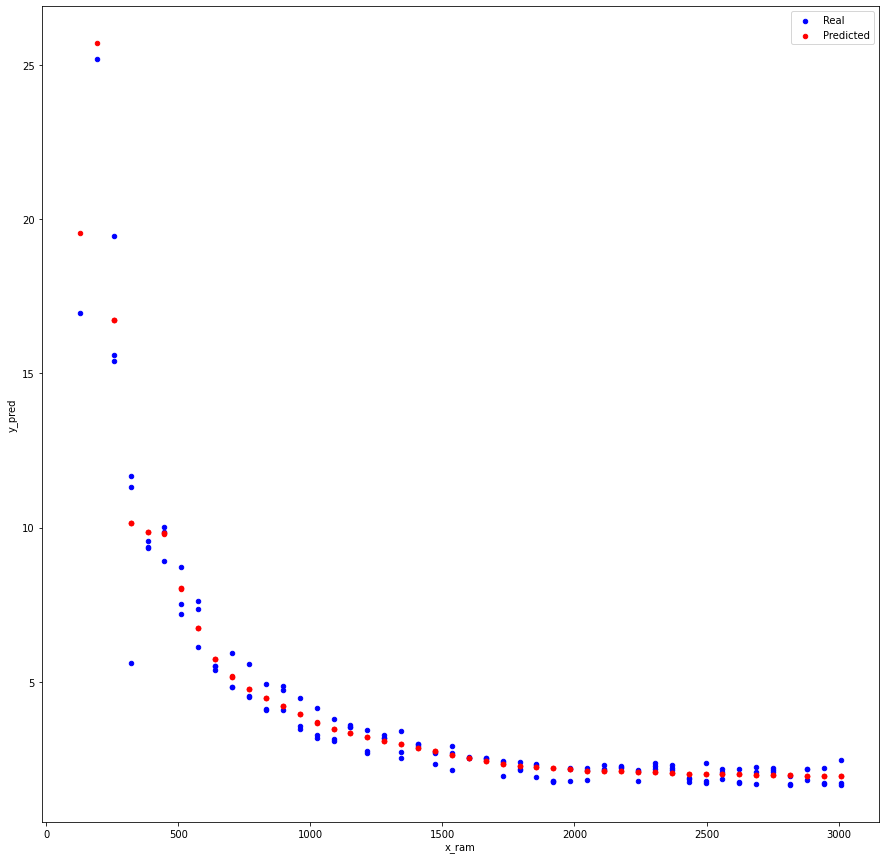

<Figure size 720x720 with 0 Axes>

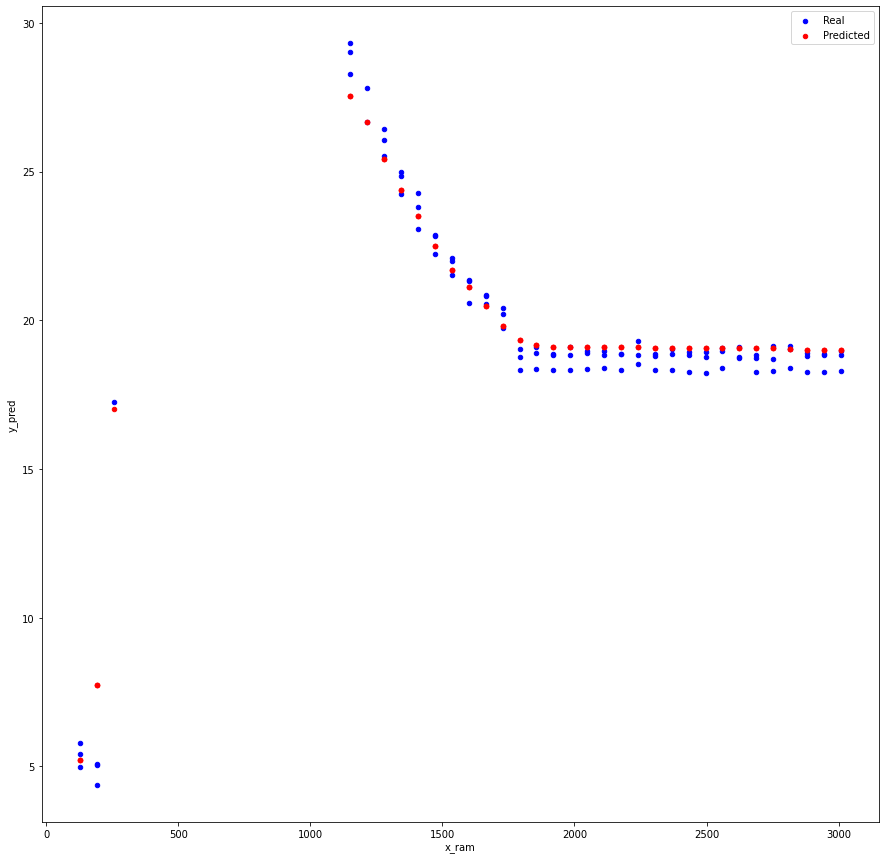

<Figure size 720x720 with 0 Axes>

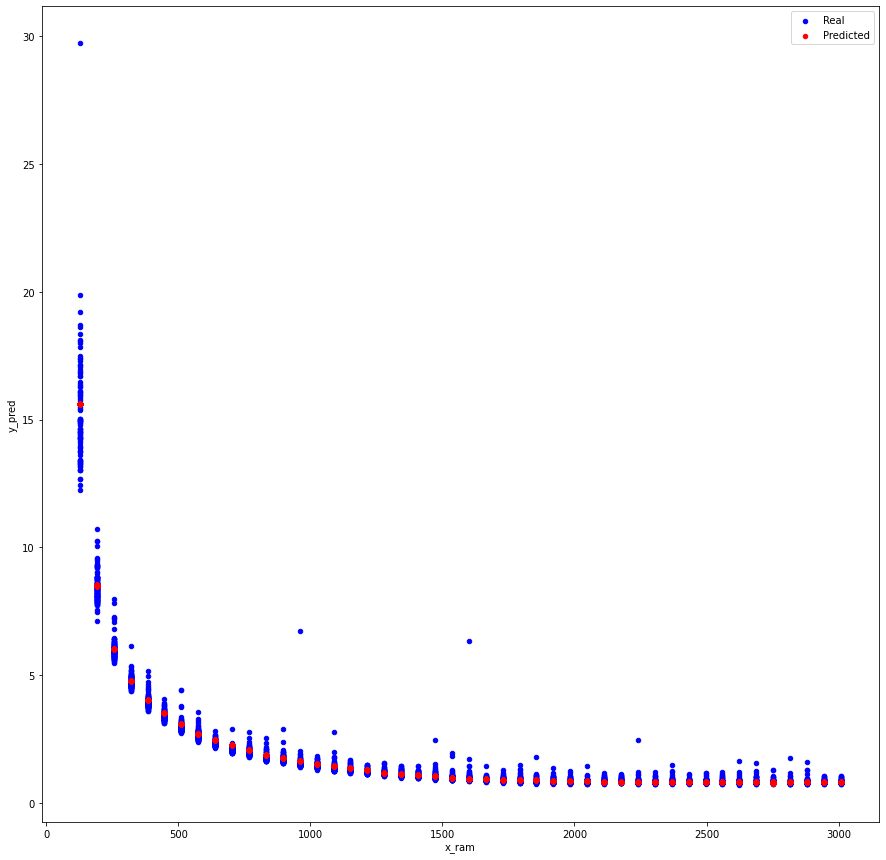

<Figure size 720x720 with 0 Axes>

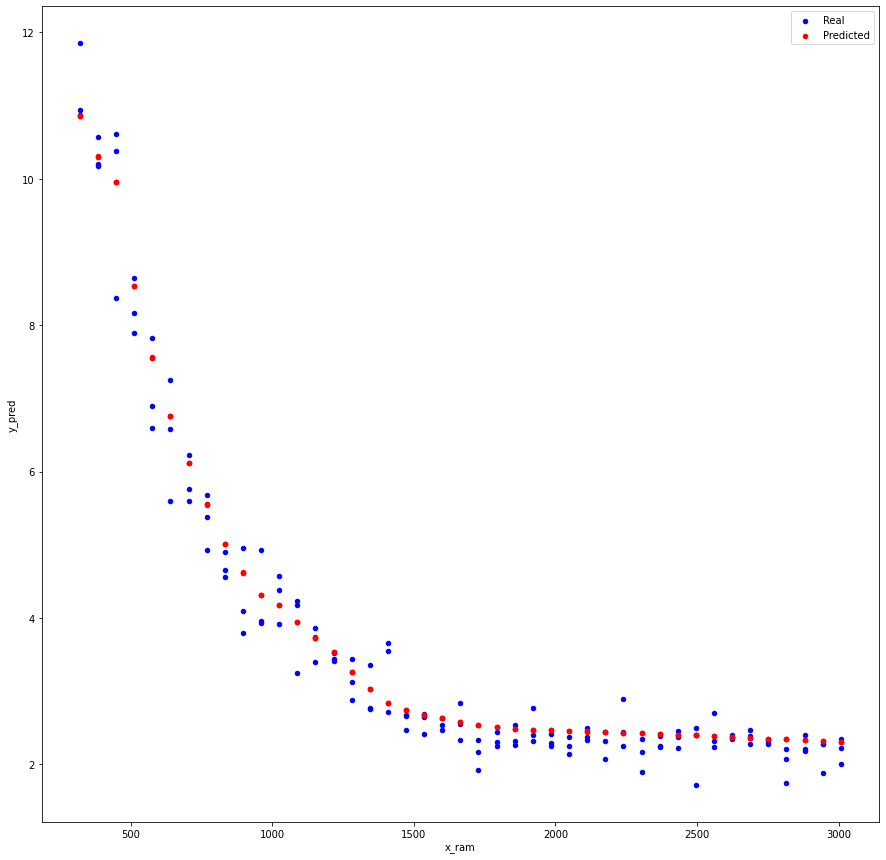

<Figure size 720x720 with 0 Axes>

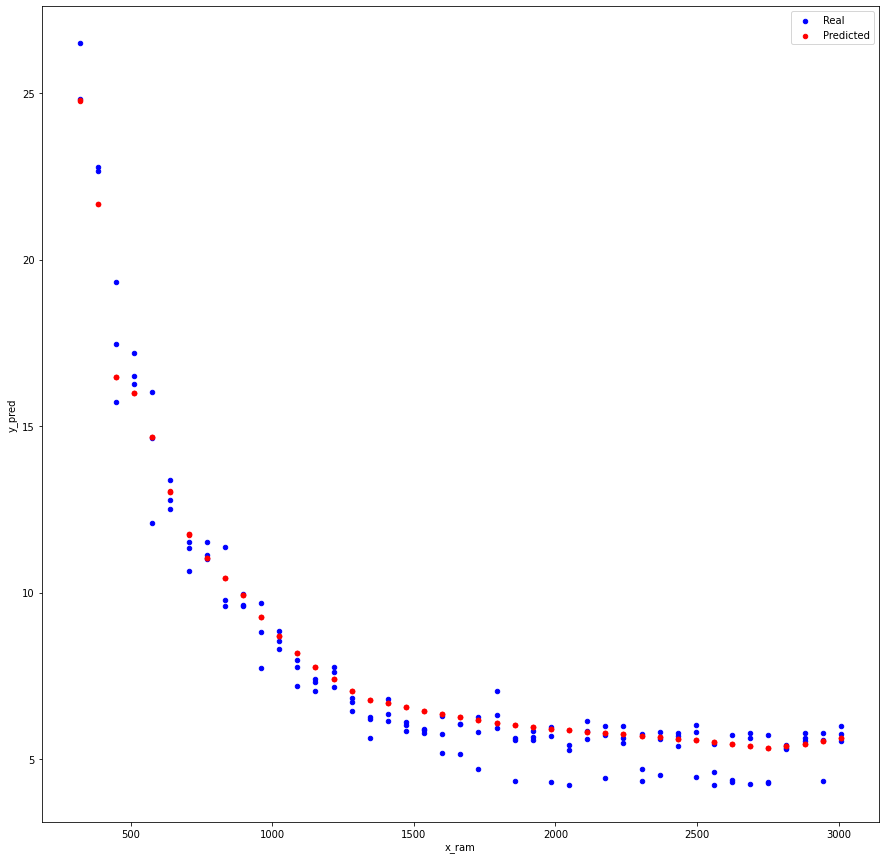

<Figure size 720x720 with 0 Axes>

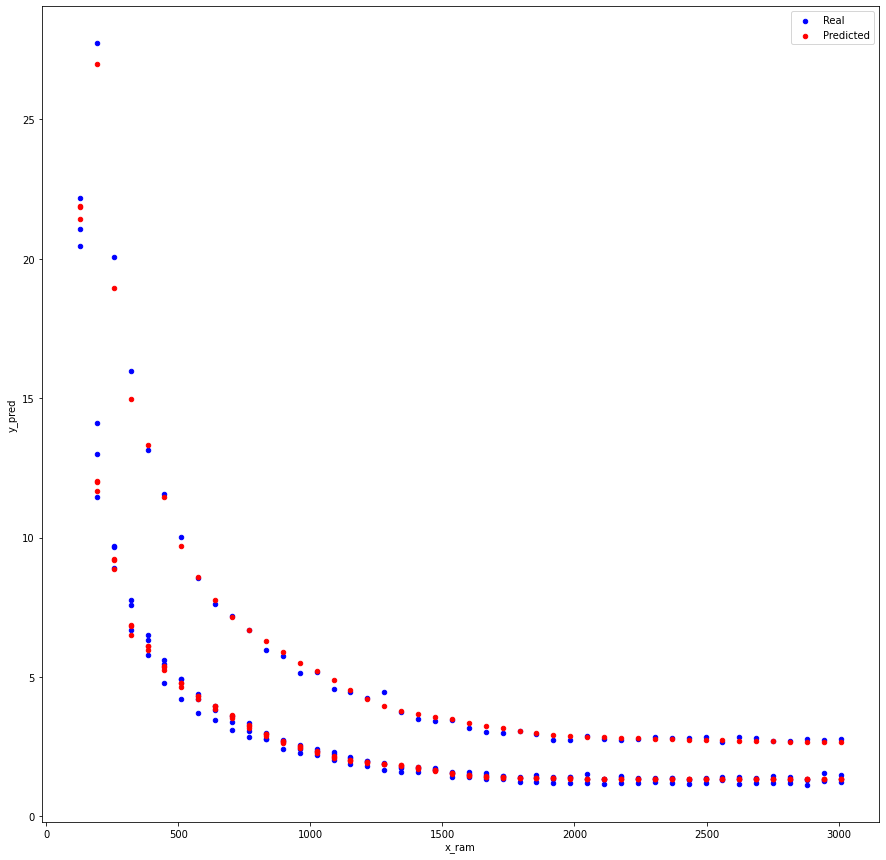

In [67]:
show_results(keras.models.load_model('./best-one-run-normalized'), x, y)


WHOLE
{'Dense': 50, 'Dense_1': 90, 'Dense_2': 90, 'Dropout': 0.02265866228192772, 'Dropout_1': 0.027089589588407712, 'Dropout_2': 0.038647175058504936, 'batch_size': 256, 'epochs': 750, 'optim': 0}

HALF
{'Dense': 50, 'Dense_1': 70, 'Dense_2': 90, 'Dropout': 0.02265866228192772, 'Dropout_1': 0.027089589588407712, 'Dropout_2': 0.038647175058504936, 'batch_size': 128, 'epochs': 1000, 'optim': 0}

256: {'Dense': 90, 'Dense_1': 70, 'Dense_2': 50, 'Dropout': 0.051599490133013515, 'Dropout_1': 0.09806548146765555, 'Dropout_2': 0.043093002872203676, 'batch_size': 256, 'epochs': 750, 'optim': 0}

In [24]:
import sys
y_pred = best_model.predict(x)
np.set_printoptions(precision=5)
np.set_printoptions(threshold=sys.maxsize)
test_vs_pred = np.concatenate((y_pred.reshape(len(y_pred), 1), y.reshape(len(y),1)), 1)*30

In [27]:
mean_absolute_error(y_pred, y)

0.0053284685

In [28]:
mean_squared_error(y_pred, y)

0.00014065931

In [32]:
dataset = pd.DataFrame({'x_ram': x[:, 0] * (3008 -  128) + 128,
                        'x_task': x[:,3]*7,
                        'x_workflow': x[:,-1]*2 + 1,
                        'y_test': test_vs_pred[:, 1],
                        'y_pred': test_vs_pred[:, 0]})

<Figure size 720x720 with 0 Axes>

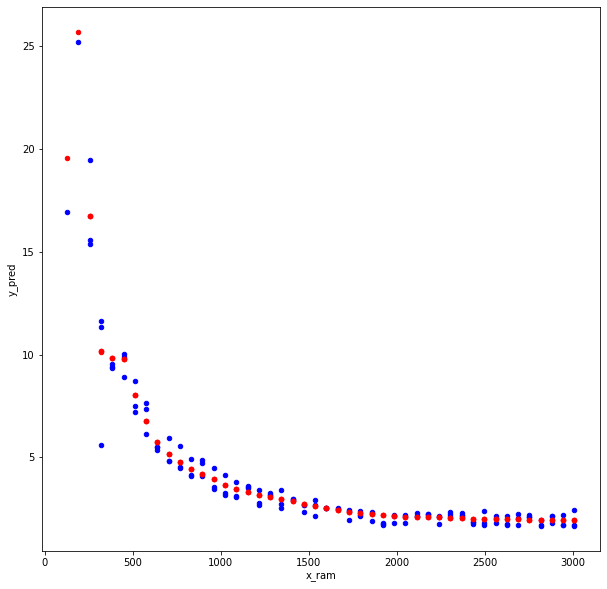

In [33]:
df = dataset[(dataset['x_task'] == 2) & (dataset['x_workflow'] == 1.0)]
plt.figure (figsize=(10,10))
ax = df.plot(kind = 'scatter', x = 'x_ram',
                  y = 'y_test', color = 'Blue', figsize=(10,10))
  
ax2 = df.plot(kind = 'scatter', x = 'x_ram', 
                   y = 'y_pred',
                   color = 'Red',
                   ax = ax, figsize=(10,10))


In [26]:
price_per_64 = 0.000000105
for ram in list(range(128, 3072 ,64)):
    print('"' + str(ram) + '":{:.8f}'.format(price_per_64 * ram / 64) + ',')

"128":0.00000021,
"192":0.00000032,
"256":0.00000042,
"320":0.00000053,
"384":0.00000063,
"448":0.00000073,
"512":0.00000084,
"576":0.00000095,
"640":0.00000105,
"704":0.00000115,
"768":0.00000126,
"832":0.00000137,
"896":0.00000147,
"960":0.00000157,
"1024":0.00000168,
"1088":0.00000179,
"1152":0.00000189,
"1216":0.00000199,
"1280":0.00000210,
"1344":0.00000221,
"1408":0.00000231,
"1472":0.00000242,
"1536":0.00000252,
"1600":0.00000262,
"1664":0.00000273,
"1728":0.00000283,
"1792":0.00000294,
"1856":0.00000305,
"1920":0.00000315,
"1984":0.00000326,
"2048":0.00000336,
"2112":0.00000346,
"2176":0.00000357,
"2240":0.00000367,
"2304":0.00000378,
"2368":0.00000389,
"2432":0.00000399,
"2496":0.00000409,
"2560":0.00000420,
"2624":0.00000431,
"2688":0.00000441,
"2752":0.00000451,
"2816":0.00000462,
"2880":0.00000472,
"2944":0.00000483,
"3008":0.00000494,
